# Comparison study using Persistent homology with distance filtration

For comparison, we implement a similar pipeline using distance filtration as opposed to signed distance filtration to analyze the data. For ease of computation, computing the distance persistence diagram is equivalent to taking the absolute values of the birth and death times of points in the persistence diagram.

In [1]:
# load data
import numpy as np
import pickle
import math
import time
import sys
module_paths = ['']
for path in module_paths :
    if path not in sys.path:
        sys.path.append(path)

from utils_load_PHloc import (extract_PH_heatmaps_single_sample,
extract_heatmap_grid,
contour_heatmaps,
collect_paired_crit_sizes,
collect_indiv_crit_sizes)

from utils_load_PHloc import datasets_of_interest, injected_datasets_of_interest, levels_of_interest

# folder where you put the PHloc files
PH_folder = '' 

# choose desired anatomy: 'knee', 'long', 'both' (which is a merge of the birth-death points)
anatomy = 'knee'

# load file
filepath = PH_folder + 'PH_all_{}.pkl'.format(anatomy)
print('I will load',filepath)
PH_all_datasets = pickle.load(open(filepath, 'rb'))

# threshold value
THR = .5

# generate a new dictionary for truncated datasets
truncated_PH_all_datasets = {}
for i in datasets_of_interest:
    diagram = PH_all_datasets[i]
    truncated_PH_all_datasets[i] = diagram[diagram[:,1] >= diagram[:,0] + THR]
    
# print size of the diagrams
for i in datasets_of_interest:
    diagram1 = PH_all_datasets[i]
    diagram2 = truncated_PH_all_datasets[i]
print("done")

names = [injected_datasets_of_interest[i]+"_"+[str(x) for x in datasets_of_interest][i] for i in range(27)]

labels = ['CTRL_0%(1)', 'CTRL_0%(2)', 'CTRL_0%(3)', 'CTRL_0%(4)', 
          'U937_1%(1)', 'U937_1%(2)', 'U937_7%', 'U937_8%', 'U937_10%(1)', 'U937_10%(2)', 'U937_10%(3)', 
          'HL60_23%', 'HL60_25%(1)', 'HL60_25%(2)', 
          'P1_10%', 'P1_40%', 'P1_44%', 'P1_51%', 'P1_60%', 'P1_76%', 
          'P2_59%', 'P2_88%', 'P2_90%', 
          'MNC_53%', 'MNC_67%', 'MNC_75%', 'MNC_86%']

phases_of_interest = [0,0,0,0,
         1,1,1,1,1,1,1,
         1,1,1,
         1,2,2,2,2,1,
         2,2,2,
         1,2,2,2]

name_phase = [labels[i]+" [Phase "+str(phases_of_interest[i])+"]" for i in range(27)]

import matplotlib.pyplot as plt

################ PARAMETERS

# default values used: WEIGHTS = True (dirac masses weighted by persistence) ; SIGMA = .5

WEIGHTS = True
SIGMA = .5

# Binning parameters
XLIMS = np.array([[-15,0],[-10,10],[0,20]])
YLIMS = np.array([[-8,7],[-5,15],[0,20]])
NB_BINS_PER_SIDE = 100

groups_of_interest = [0,0,0,0,
                          1,1,2,2,2,1,2,
                          1,1,2,
                          1,1,3,3,3,1,
                          3,3,3,
                          1,3,3,3]

name_group = [labels[i]+" [Group "+str(groups_of_interest[i])+"]" for i in range(27)]

import sklearn

import torch

# pds contains all diagrams
pds = [truncated_PH_all_datasets[i] for i in datasets_of_interest]


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode
I will load PH_all_knee.pkl
done


# Convert SDPH diagrams into DPH diagrams

In [2]:
# convert the SDPH diagram into Distance PH diagrams by taking the absolute values of the points 
for j in range(27):
    pds[j] = np.abs(pds[j])

In [3]:
# change bounds 
XLIMS = np.array([[0,15],[0,10],[0,20]])
YLIMS = np.array([[0,8],[0,15],[0,20]])

CTRL_0%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


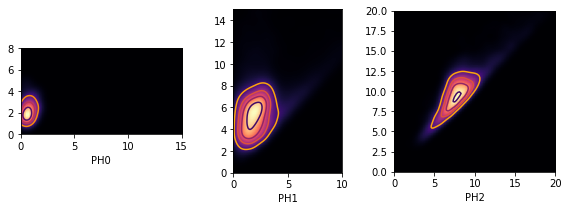

CTRL_0%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


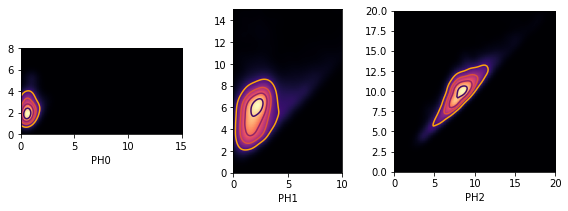

CTRL_0%(3)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


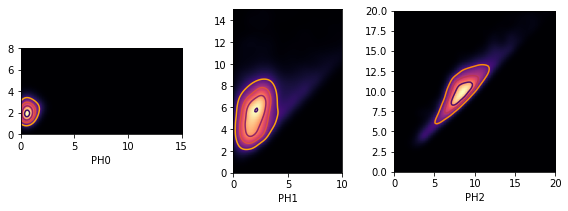

CTRL_0%(4)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


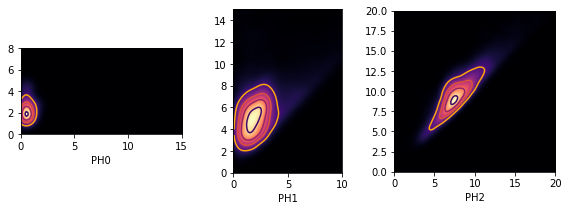

U937_1%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


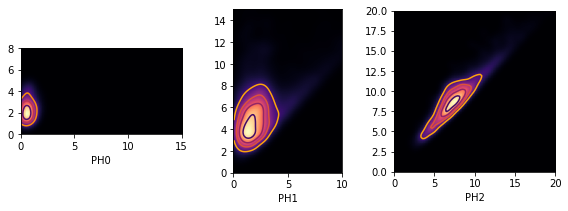

U937_1%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


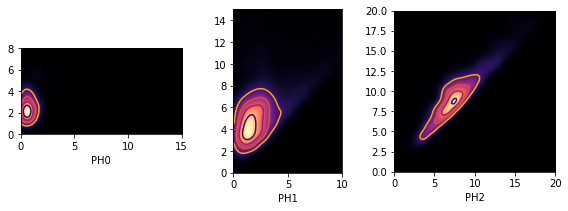

U937_7%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


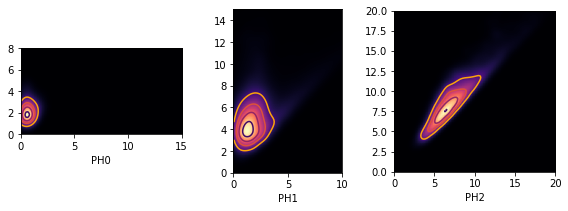

U937_8%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


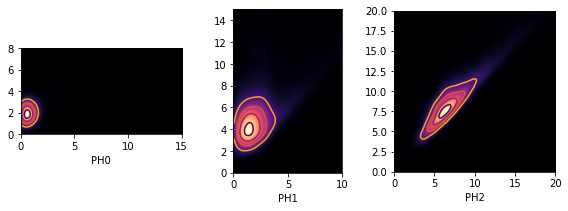

U937_10%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


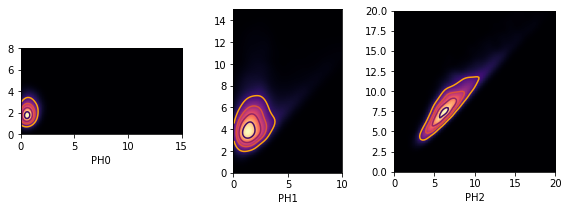

U937_10%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


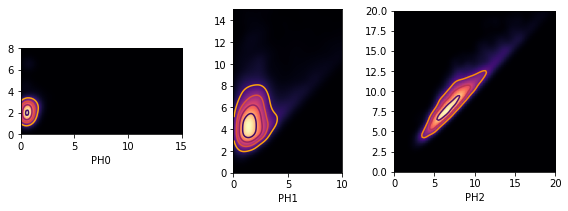

U937_10%(3)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


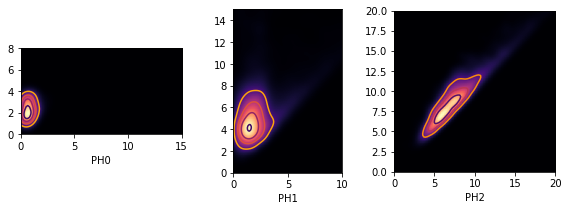

HL60_23%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


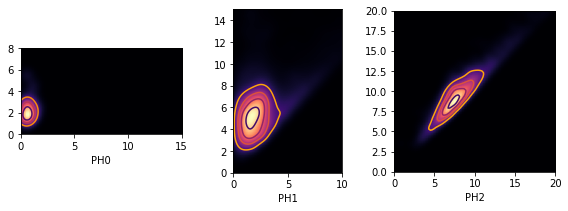

HL60_25%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


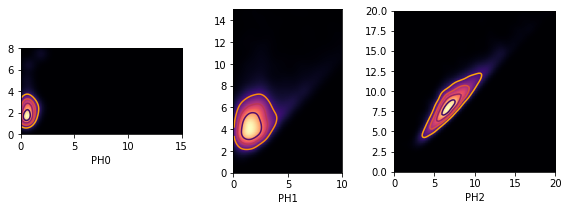

HL60_25%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


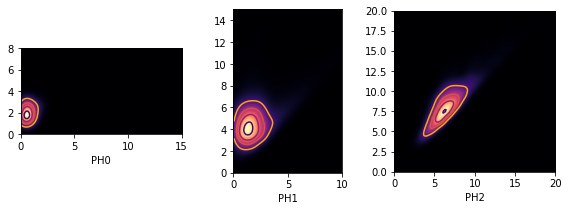

P1_10%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


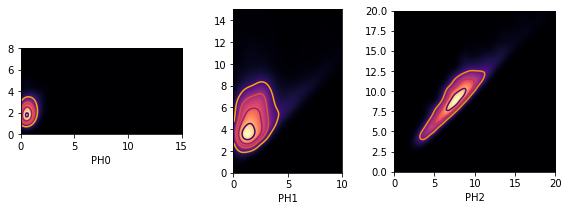

P1_40%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


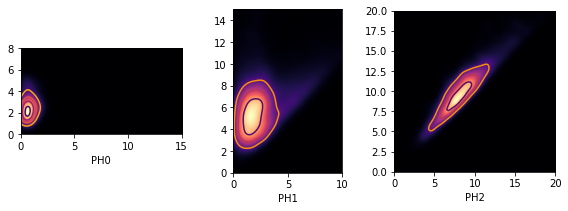

P1_44%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


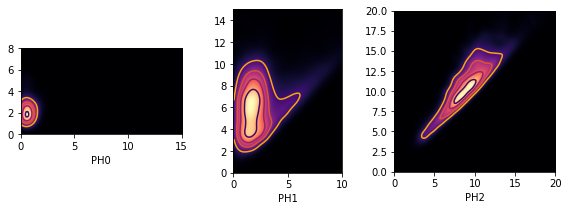

P1_51%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


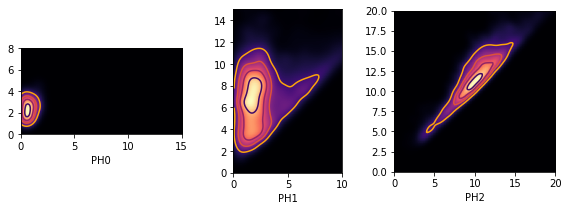

P1_60%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


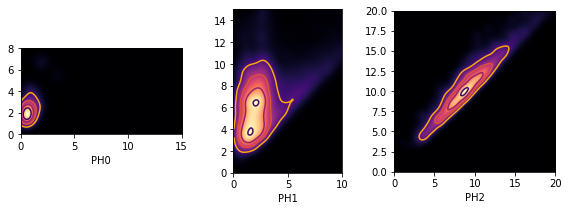

P1_76%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


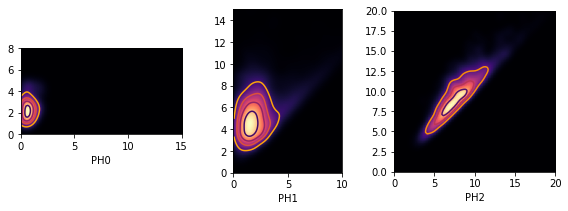

P2_59%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


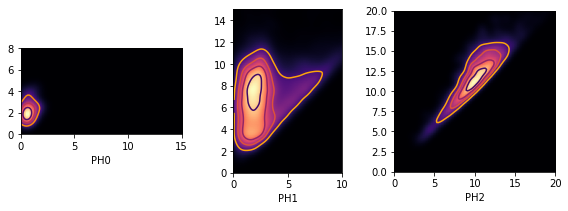

P2_88%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


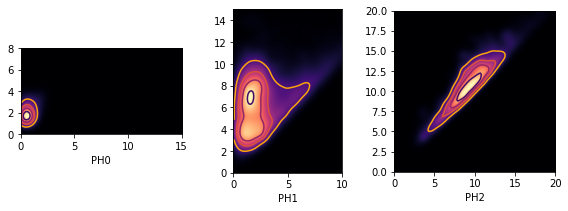

P2_90%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


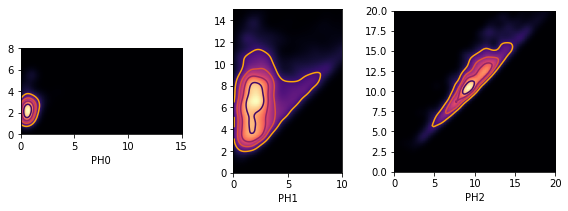

MNC_53%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


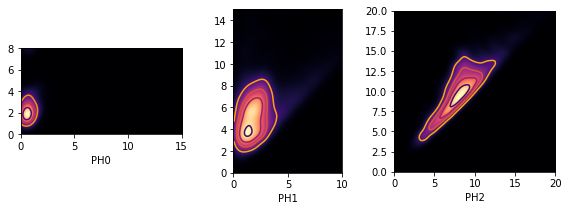

MNC_67%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


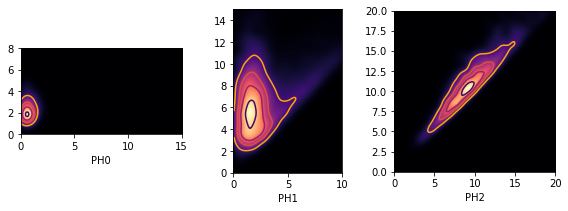

MNC_75%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


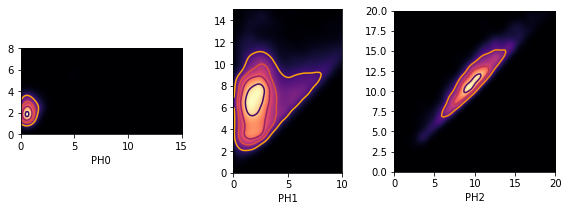

MNC_86%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


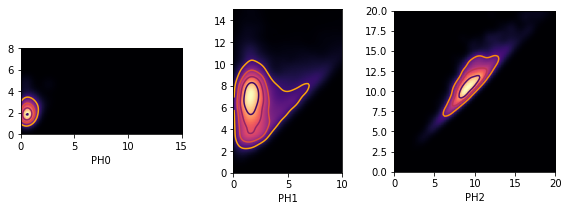

In [13]:
# plot all the diagrams
for i in range(27):
    print(labels[i])
    heatmaps = extract_PH_heatmaps_single_sample(pds[i], THR, WEIGHTS, SIGMA, XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                     discard_PH0_NW = True, option = 'keops') 
    contour_heatmaps(heatmaps, XLIMS, YLIMS) 

# Hierarchical tree

In [15]:
heatmaps_list = []
for i in range(27):
    heatmaps_list.append(extract_PH_heatmaps_single_sample(pds[i], THR, WEIGHTS, SIGMA,
                                                XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                                   discard_PH0_NW = False,
                                                   option = 'keops'))
    
# noramlize
for i in range(27):
    maps0 = heatmaps_list[i][0]
    maps1 = heatmaps_list[i][1]
    maps2 = heatmaps_list[i][2]
    heatmaps_list[i][0] = maps0/np.sum(maps0)
    heatmaps_list[i][1] = maps1/np.sum(maps1)
    heatmaps_list[i][2] = maps2/np.sum(maps2)

excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points
excluded low-persistence points


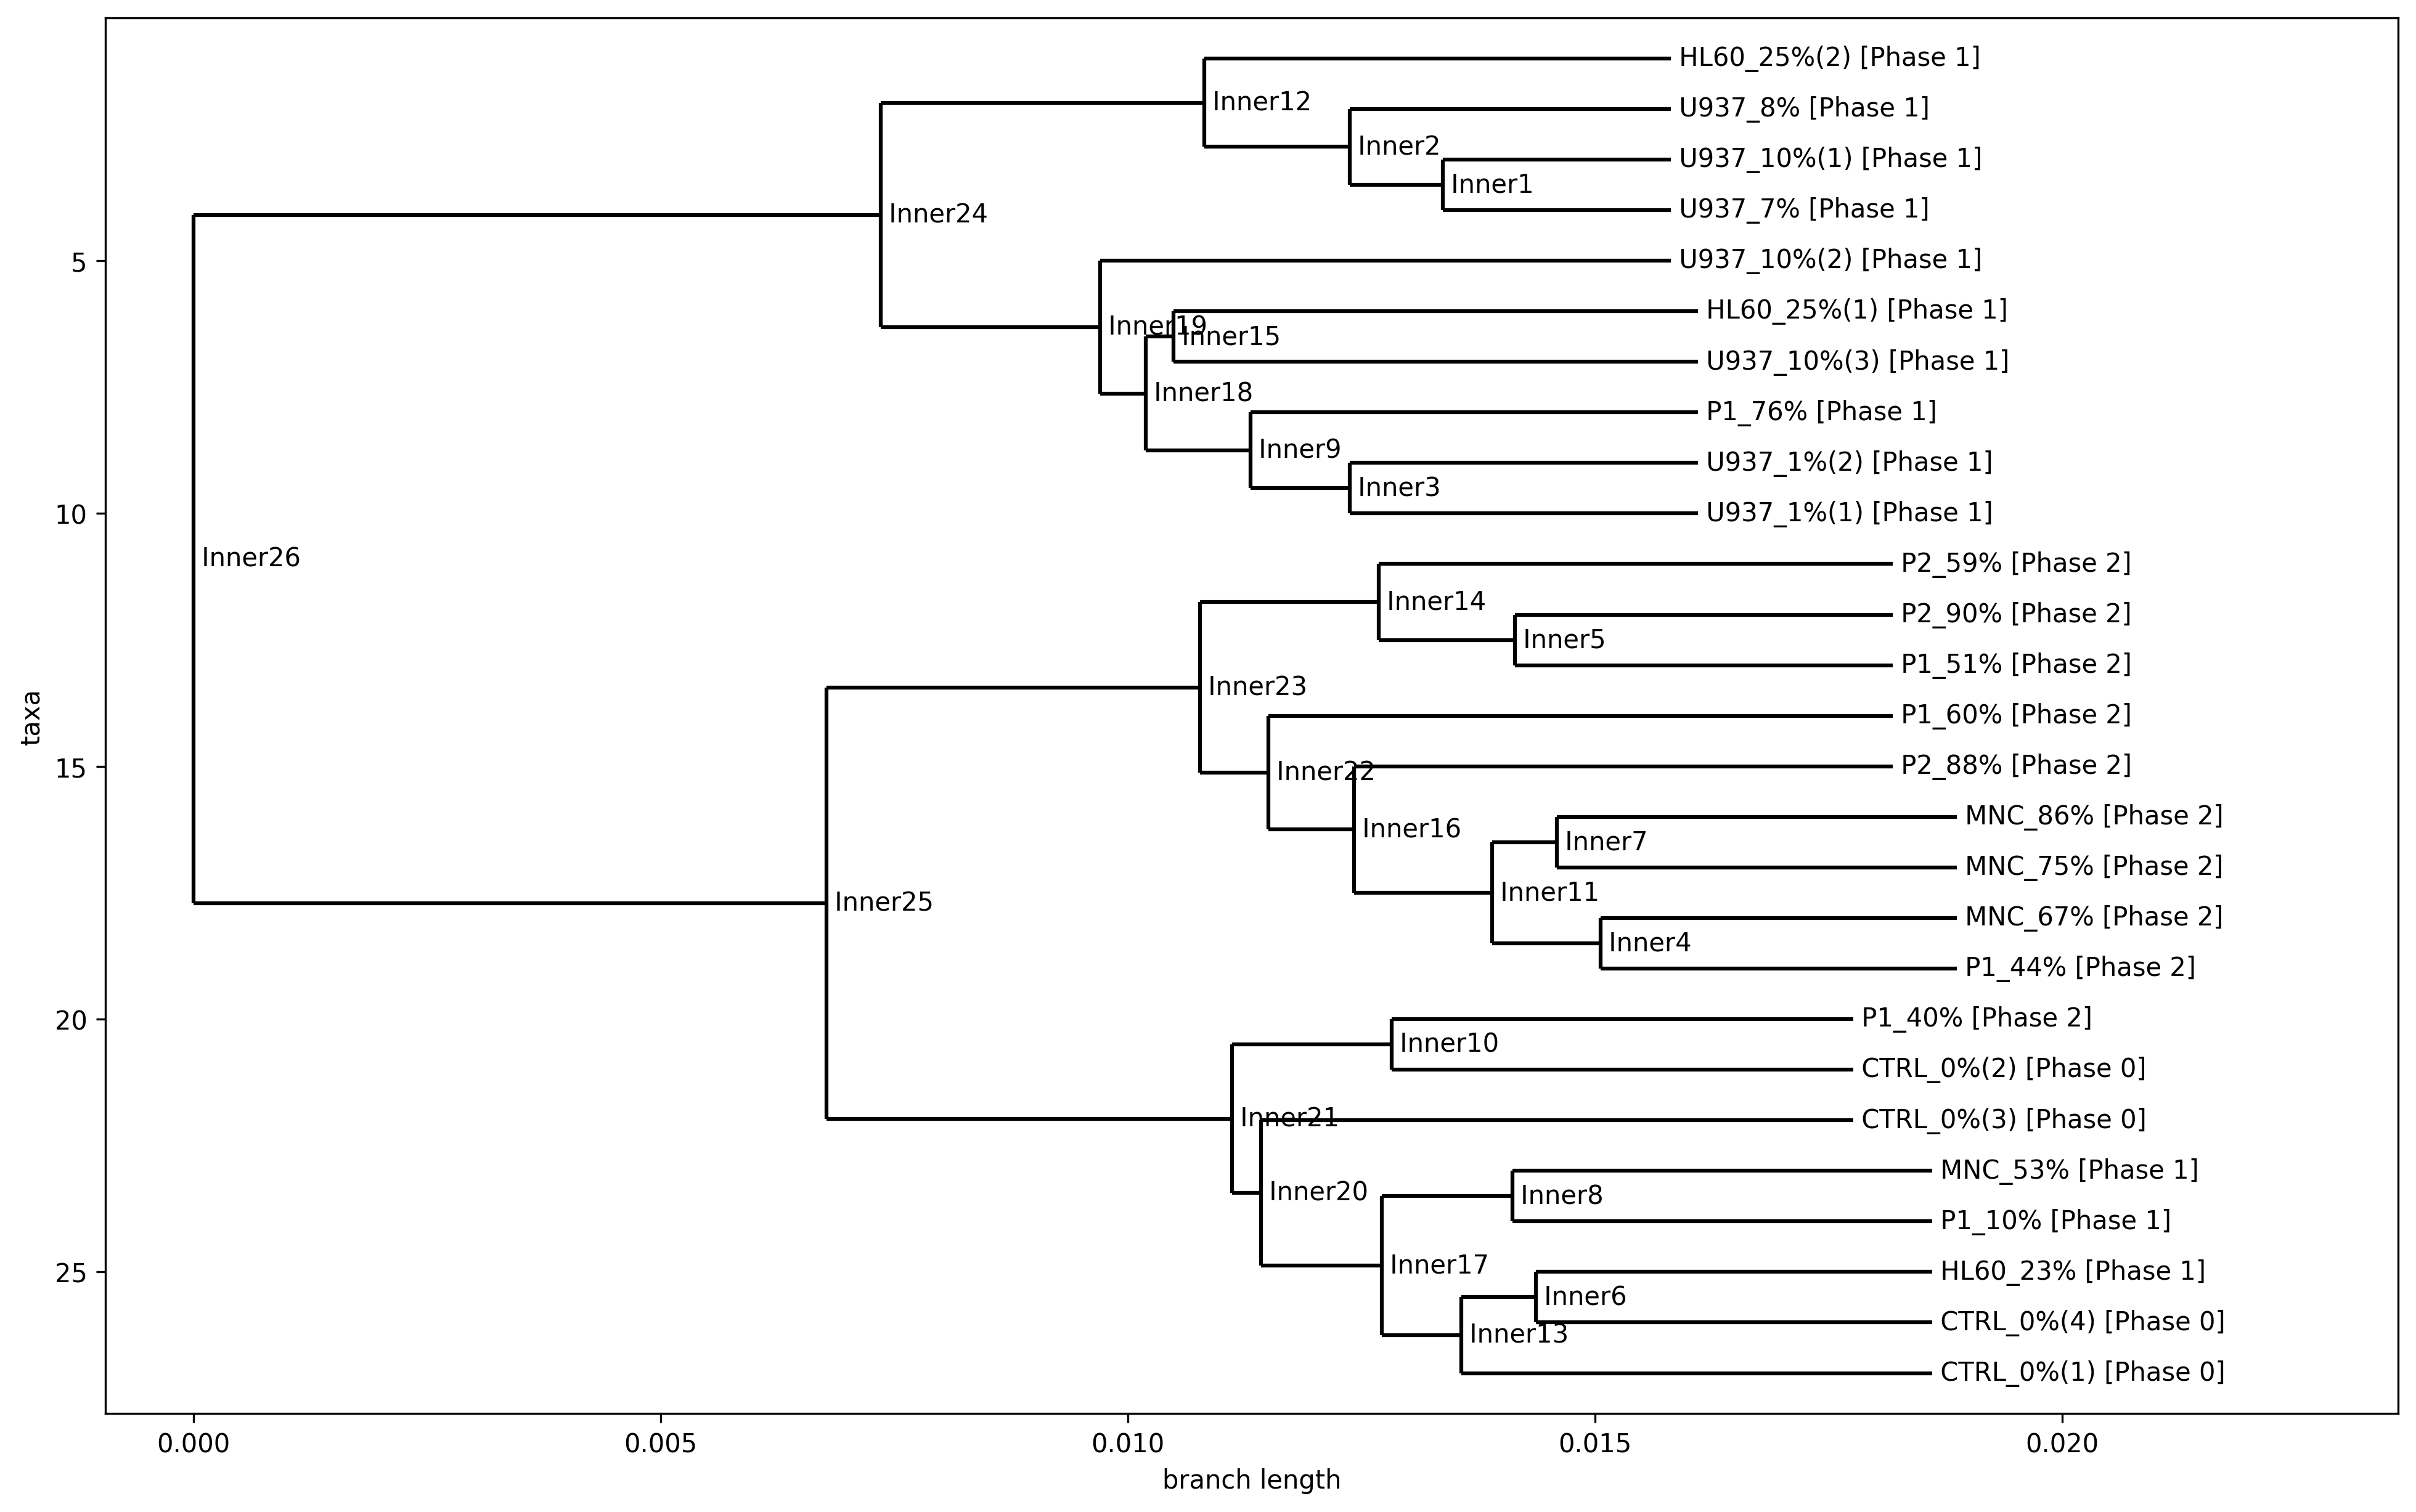

In [17]:
# Importing necessary libraries from BioPython
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor


heatmap_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i]-heatmaps_list[j]))
    heatmap_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap_distlist)
UPGMATree = constructor.upgma(heatmap_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

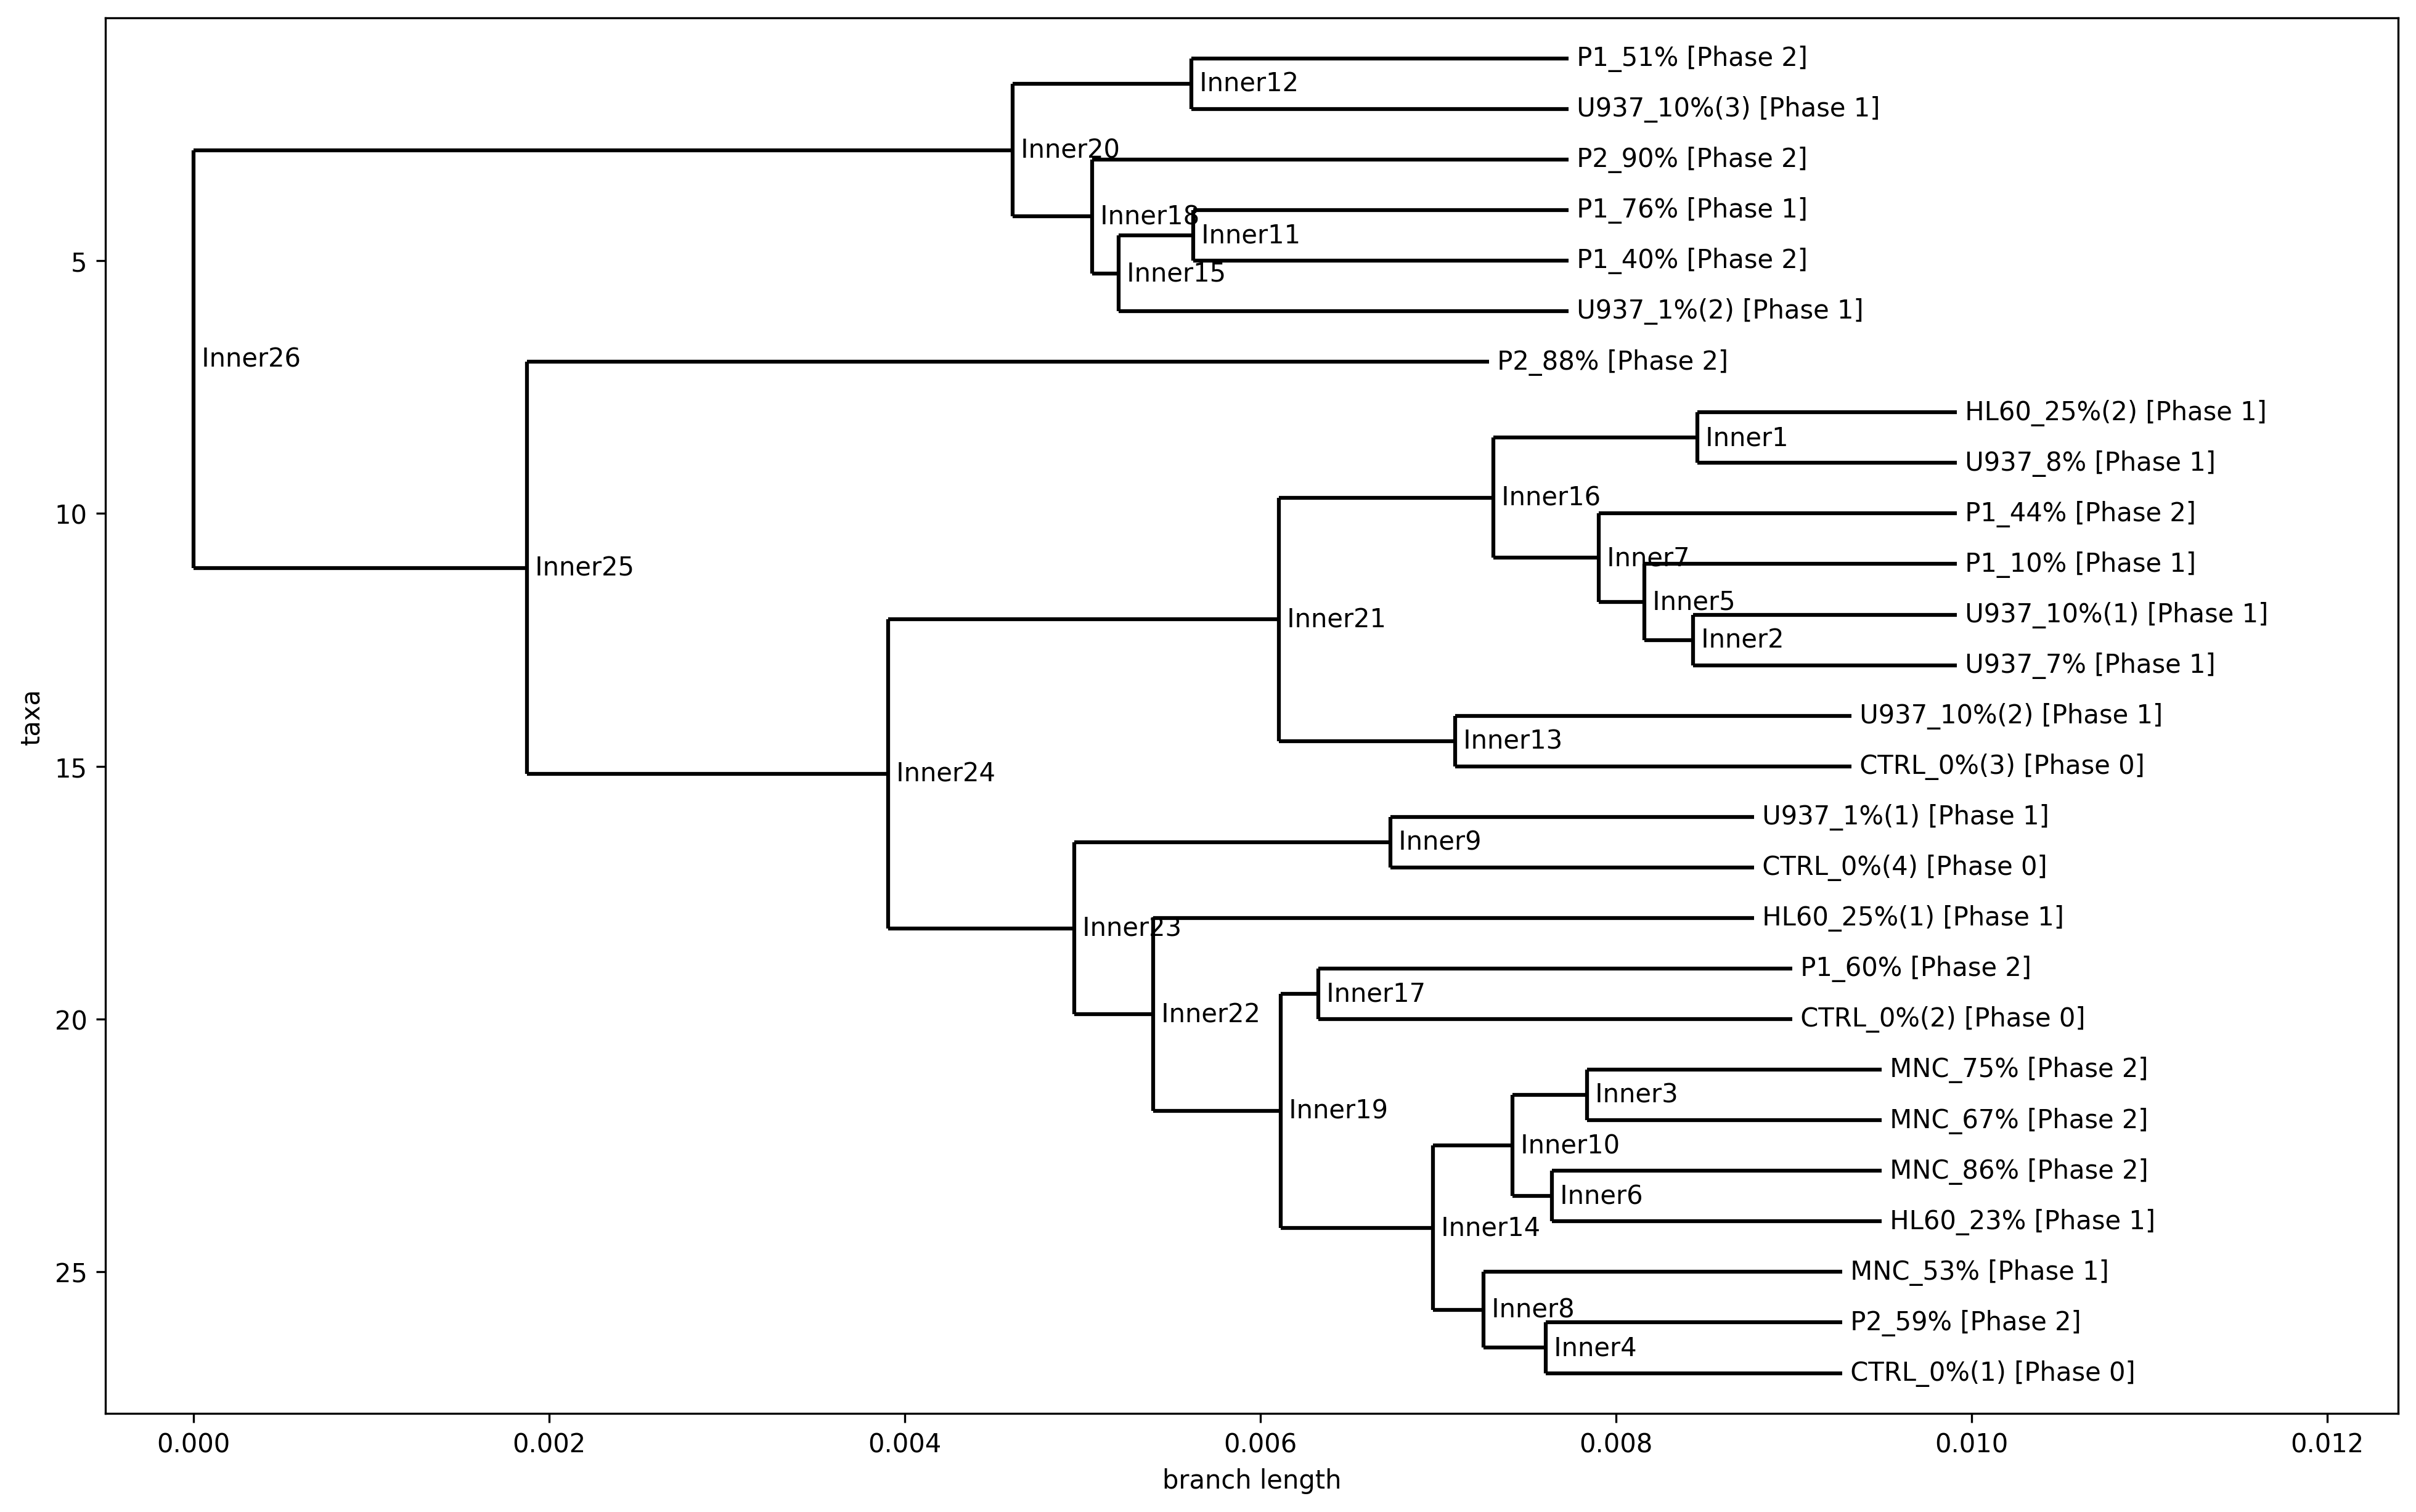

In [18]:
heatmap0_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][0]-heatmaps_list[j][0]))
    heatmap0_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap0_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap0_distlist)
UPGMATree = constructor.upgma(heatmap0_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

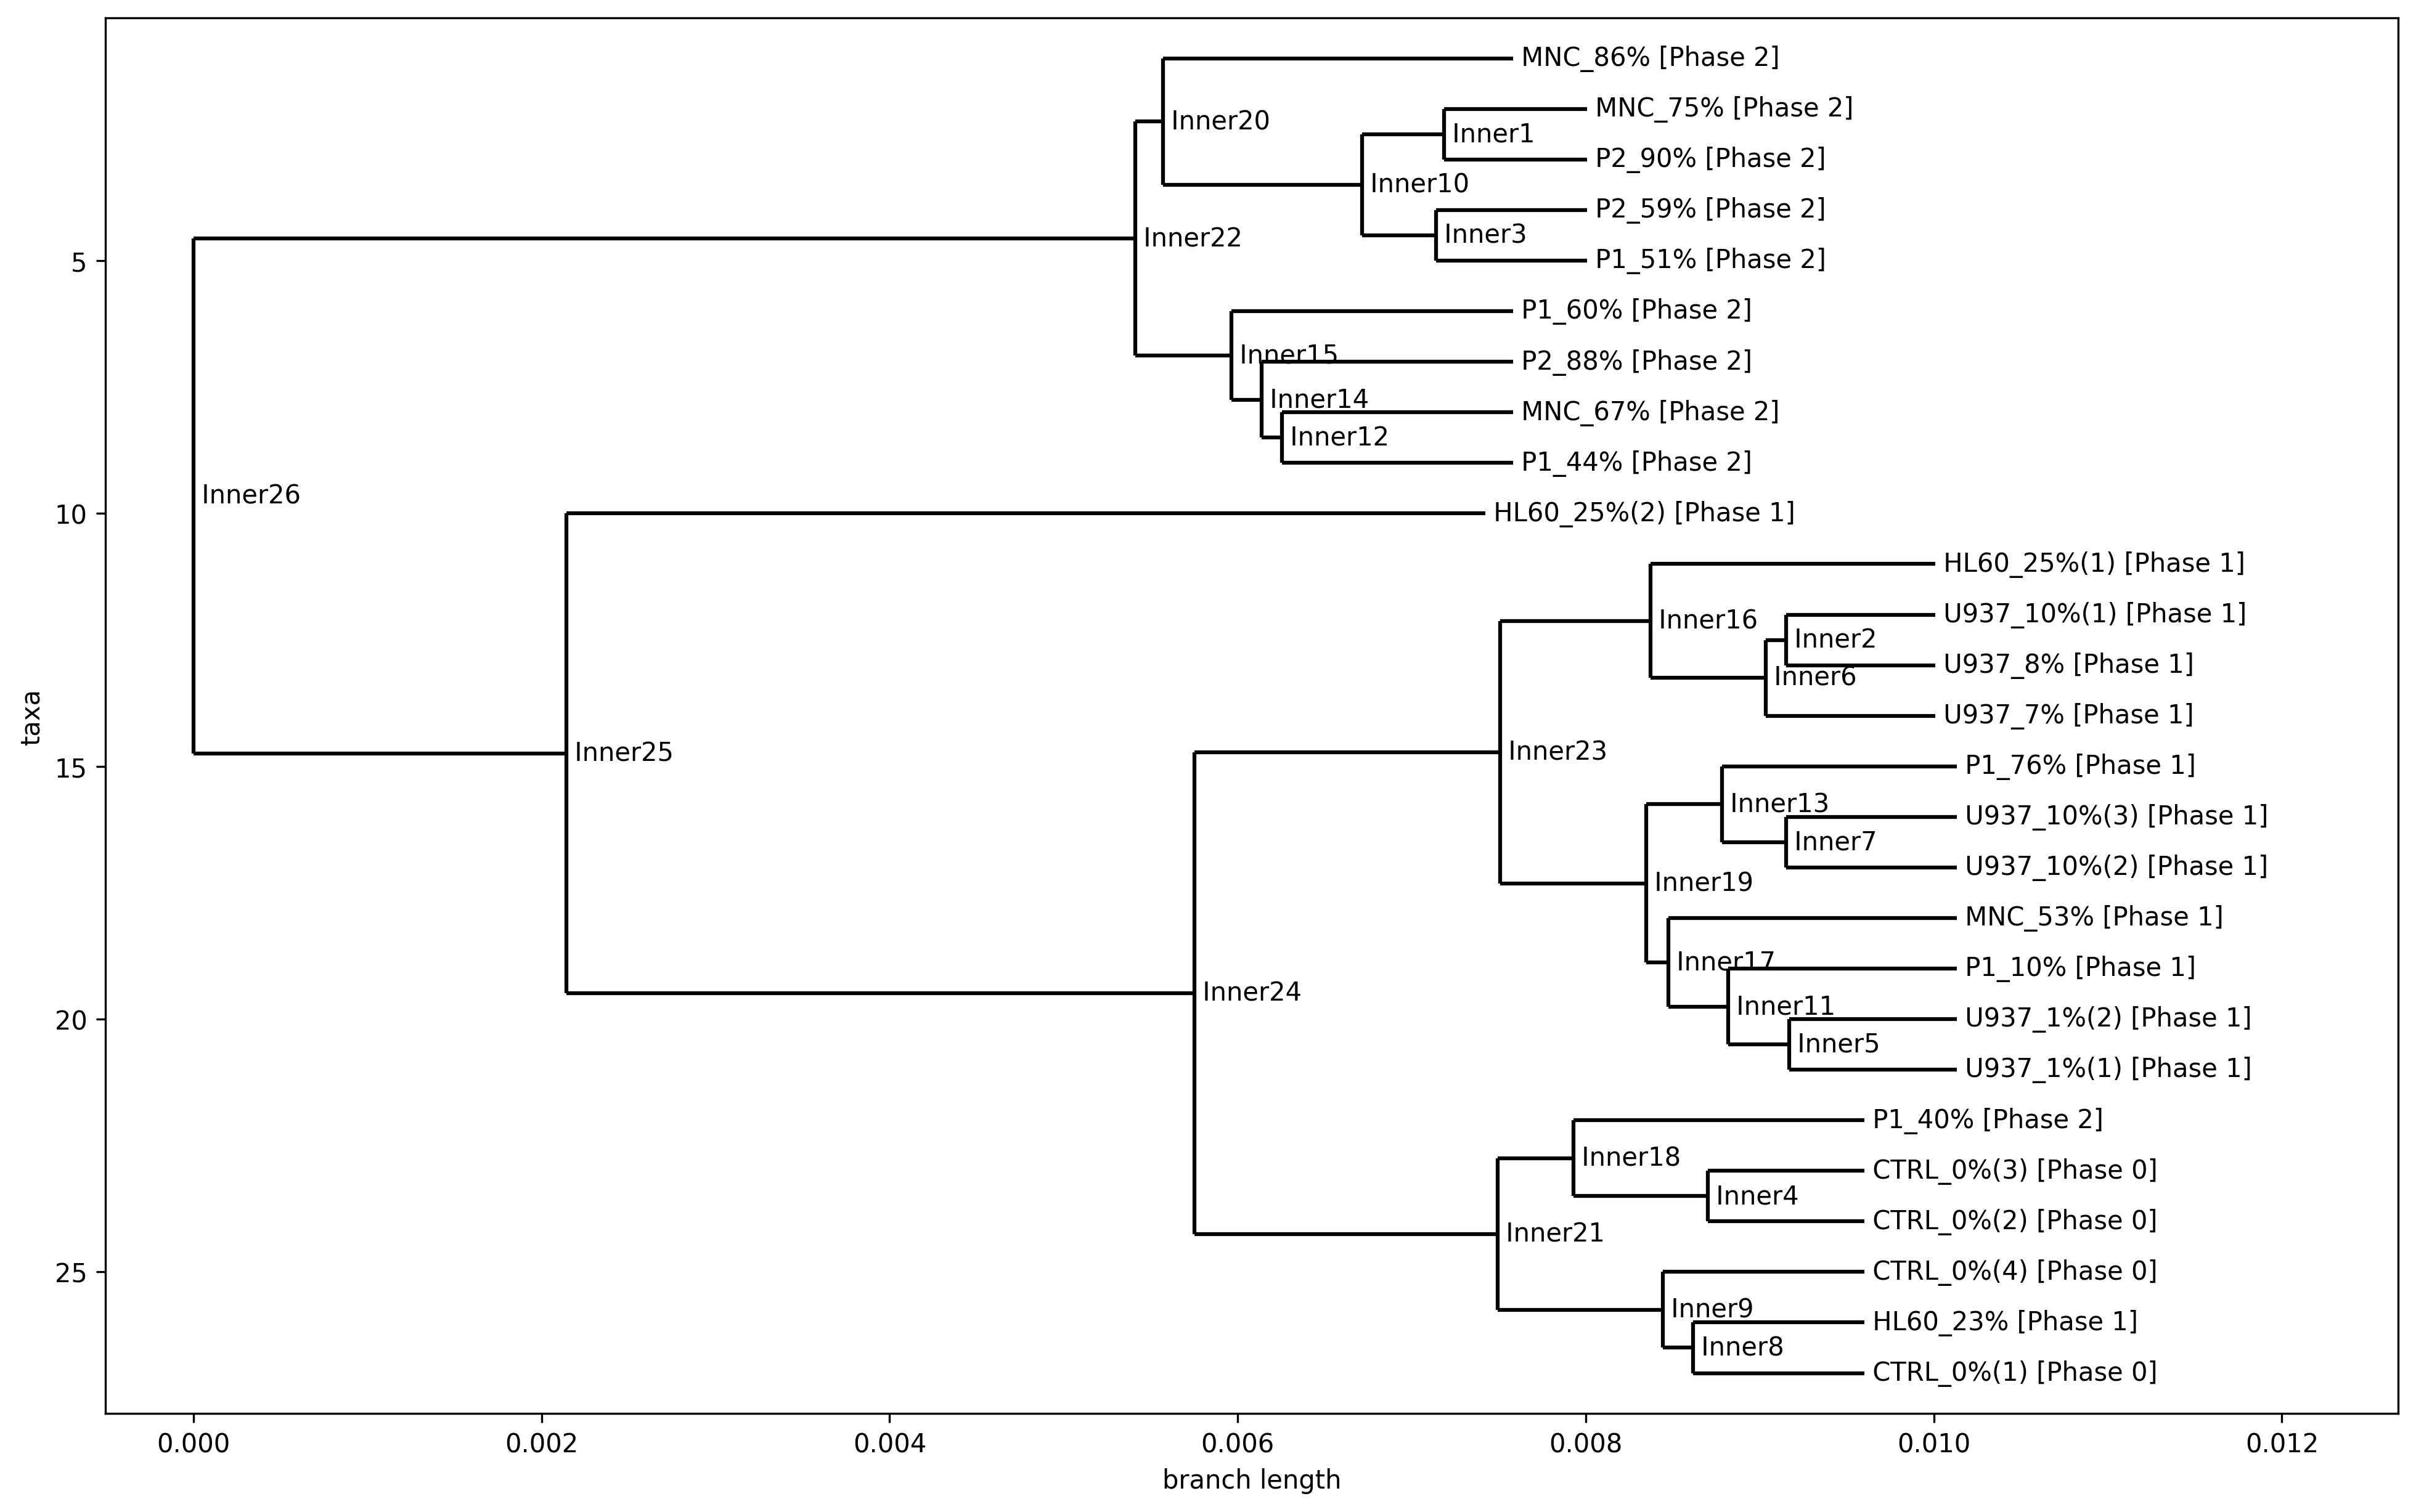

In [19]:
heatmap1_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][1]-heatmaps_list[j][1]))
    heatmap1_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap1_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap1_distlist)
UPGMATree = constructor.upgma(heatmap1_distmat)
fig = plt.figure(figsize=(16,10),dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

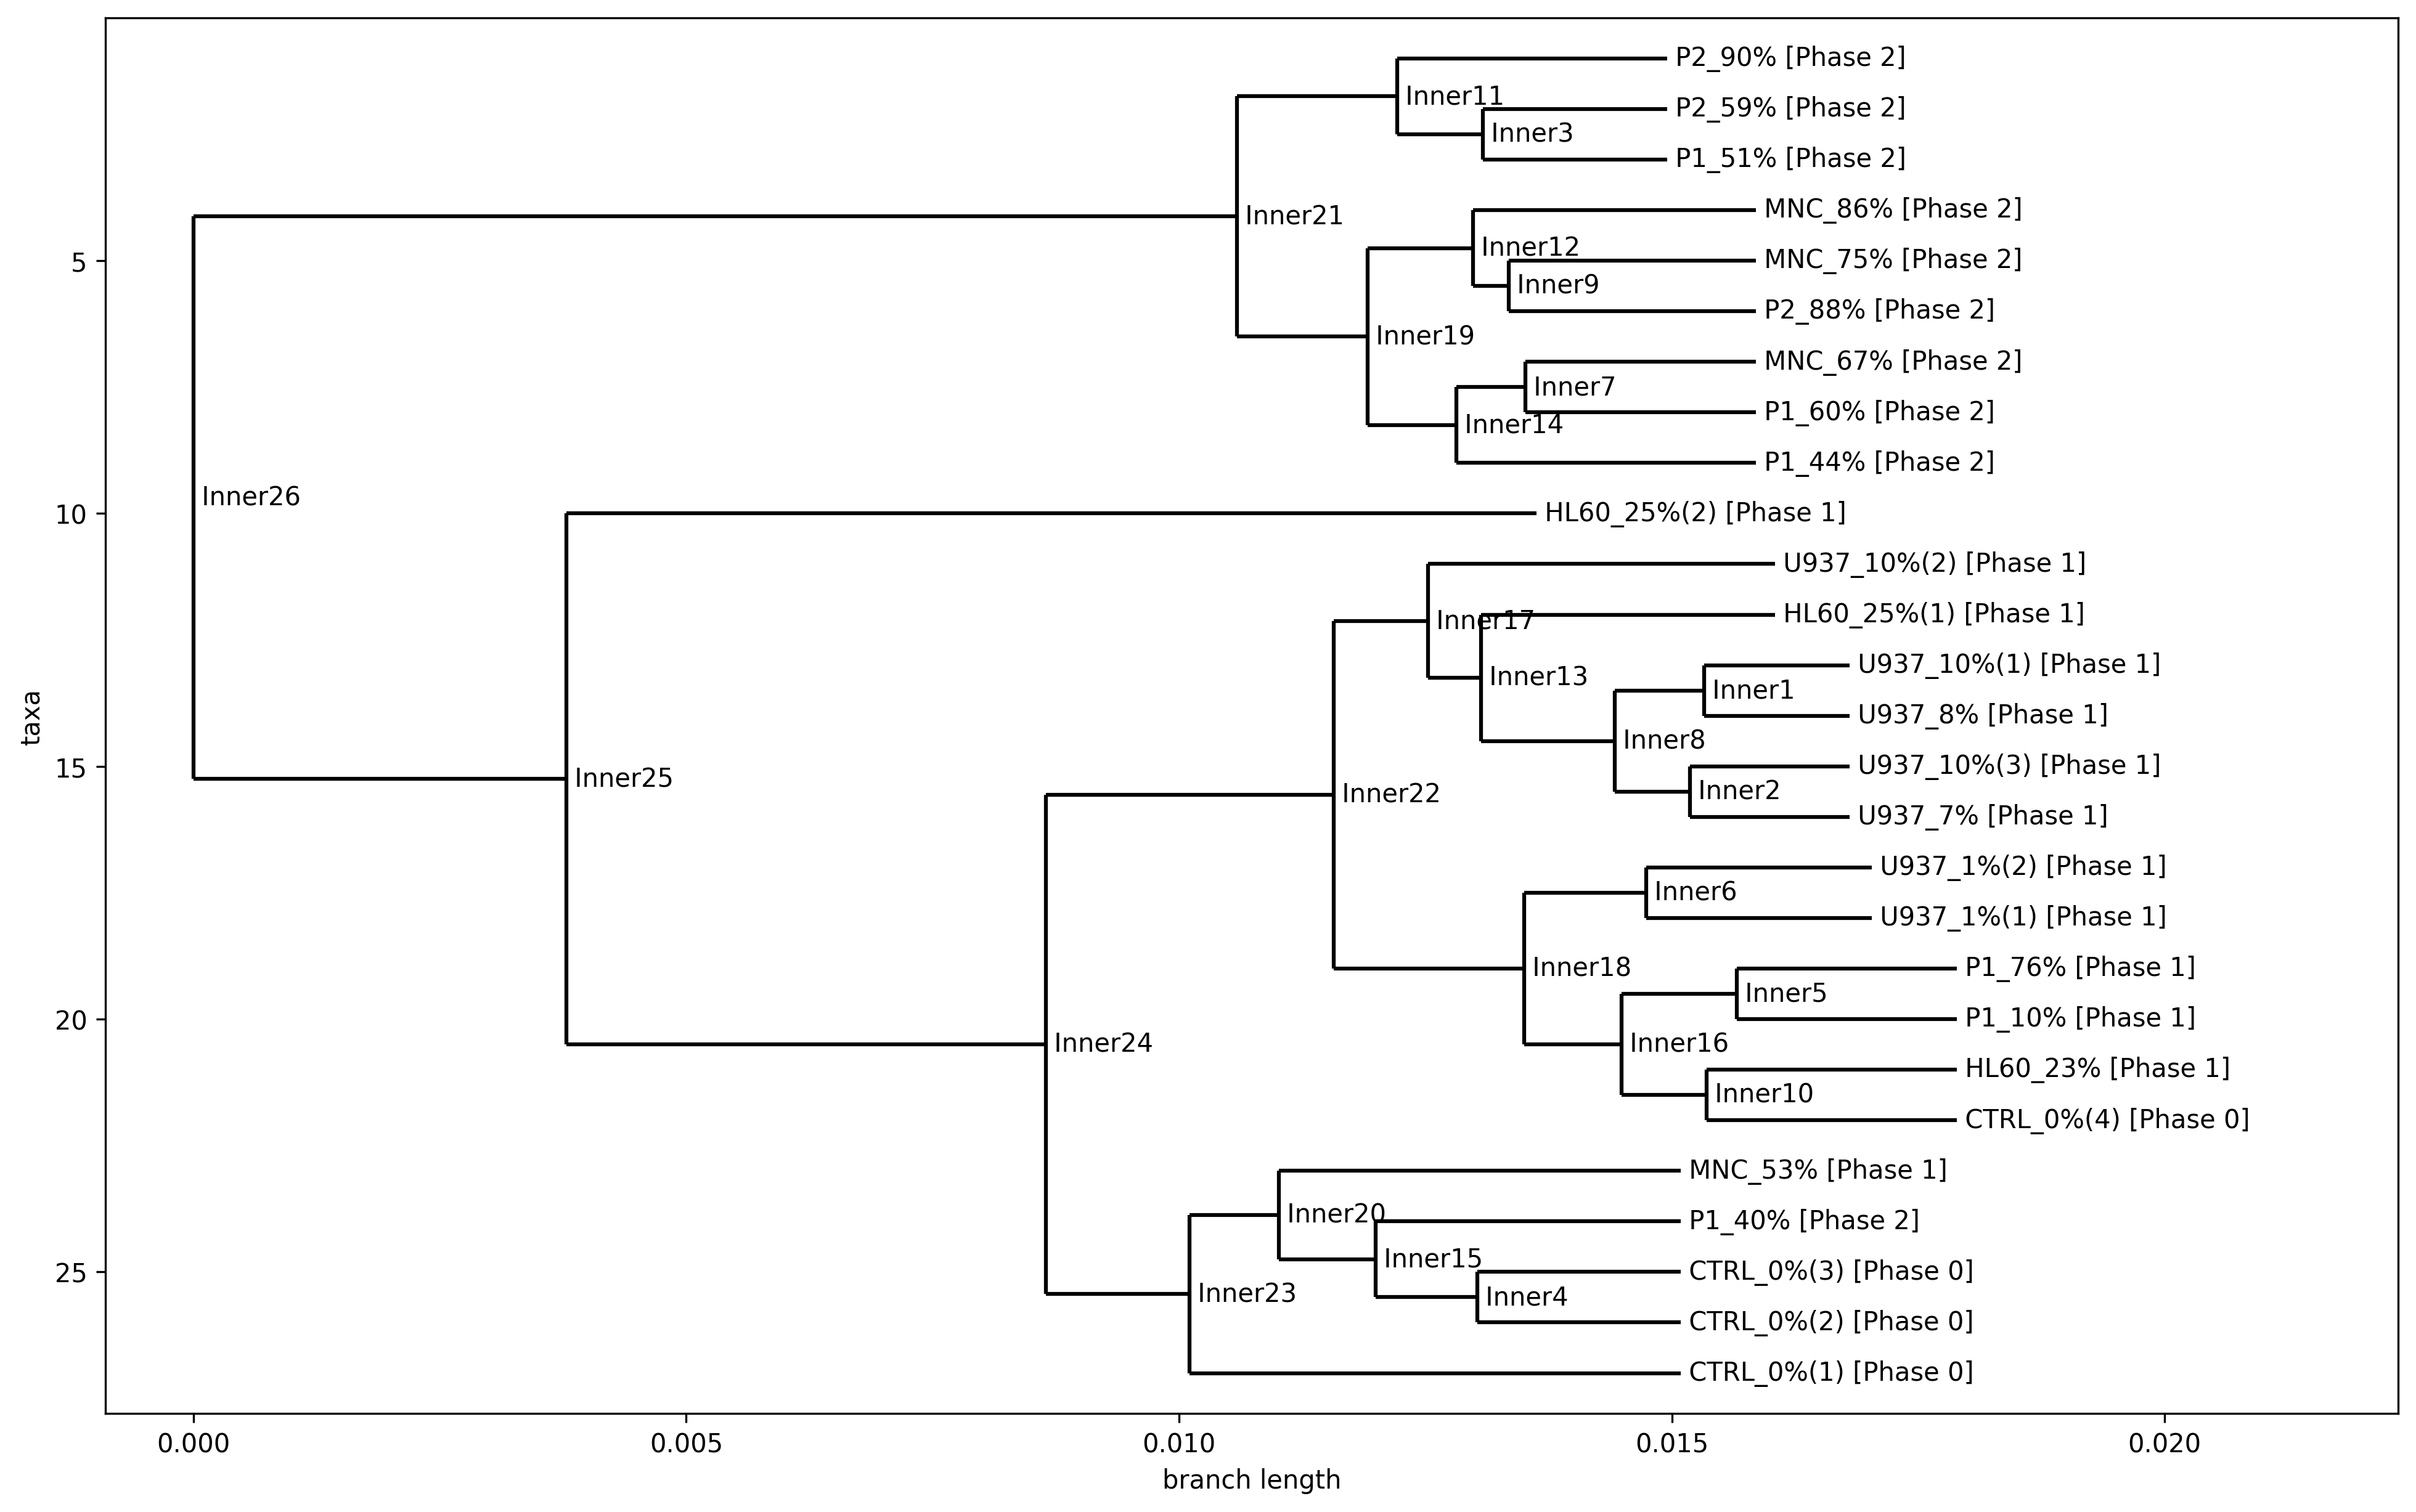

In [20]:
heatmap2_distlist = []
for i in range(27):
    ls = []
    for j in range(i+1):
        ls.append(np.linalg.norm(heatmaps_list[i][2]-heatmaps_list[j][2]))
    heatmap2_distlist.append(ls)
    
constructor = DistanceTreeConstructor()
heatmap2_distmat = Phylo.TreeConstruction._DistanceMatrix(name_phase, heatmap2_distlist)
UPGMATree = constructor.upgma(heatmap2_distmat)
fig = plt.figure(figsize=(16,10), dpi=300)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(UPGMATree, axes=axes)

# Determine the optimal size of mixture

In [4]:
# for persim need to convert the data into the form of list of arrays, one for each dimension
pds_list = []
for j in range(27):
    current_pd = pds[j]
    pds_list.append([current_pd[current_pd[:,2]==i,:2] for i in range(3)])

In [71]:
# separate into PH0, PH1 and PH2 diagrams

ph0 =  [pds_list[i][0] for i in range(27)]
ph1 =  [pds_list[i][1] for i in range(27)]
ph2 =  [pds_list[i][2] for i in range(27)]

In [74]:
# remove points of low persistence
for i in range(27):
    current_ph0 = ph0[i]
    current_ph1 = ph1[i]
    current_ph2 = ph2[i]
    # remove points with persistence less than 0.5
    ph0[i] = current_ph0[current_ph0[:,1]-current_ph0[:,0]>0.5,:]
    ph1[i] = current_ph1[current_ph1[:,1]-current_ph1[:,0]>0.5,:]
    ph2[i] = current_ph2[current_ph2[:,1]-current_ph2[:,0]>0.5,:]
    


In [75]:
phase0_index = [0,1,2,3]
phase1_index = [4,5,6,7,8,9,10,11,12,13,14,19,23]
phase2_index = [15,16,17,18,20,21,22,24,25,26]

# putting together the diagrams of the same phase

phase0_ph0 = [ph0[x] for x in phase0_index]
phase1_ph0 = [ph0[x] for x in phase1_index]
phase2_ph0 = [ph0[x] for x in phase2_index]

phase0_ph1 = [ph1[x] for x in phase0_index]
phase1_ph1 = [ph1[x] for x in phase1_index]
phase2_ph1 = [ph1[x] for x in phase2_index]

phase0_ph2 = [ph2[x] for x in phase0_index]
phase1_ph2 = [ph2[x] for x in phase1_index]
phase2_ph2 = [ph2[x] for x in phase2_index]

#stacking together points of the same phase 

phase0_ph0_pts = np.vstack(phase0_ph0)
phase1_ph0_pts = np.vstack(phase1_ph0)
phase2_ph0_pts = np.vstack(phase2_ph0)

allphase_ph0_pts = np.vstack(ph0)

phase0_ph1_pts = np.vstack(phase0_ph1)
phase1_ph1_pts = np.vstack(phase1_ph1)
phase2_ph1_pts = np.vstack(phase2_ph1)

allphase_ph1_pts = np.vstack(ph1)

phase0_ph2_pts = np.vstack(phase0_ph2)
phase1_ph2_pts = np.vstack(phase1_ph2)
phase2_ph2_pts = np.vstack(phase2_ph2)

allphase_ph2_pts = np.vstack(ph2)

CTRL_0%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


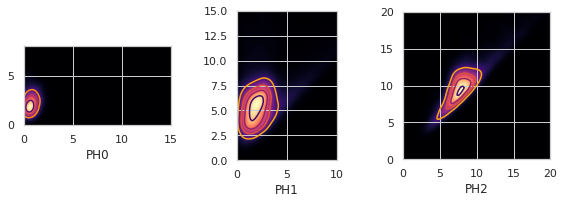

CTRL_0%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


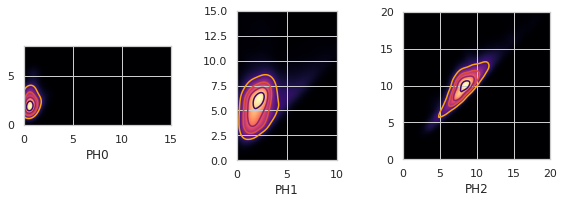

CTRL_0%(3)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


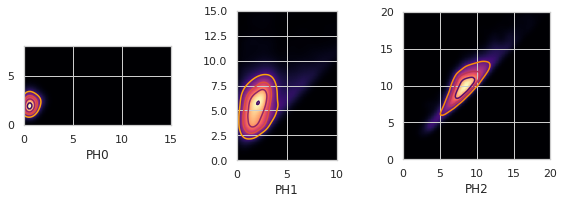

CTRL_0%(4)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


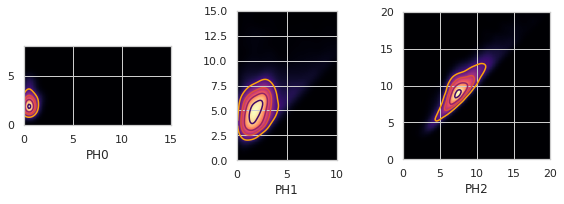

U937_1%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


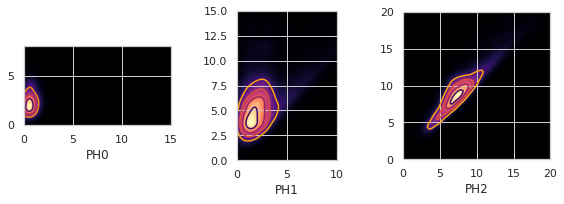

U937_1%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


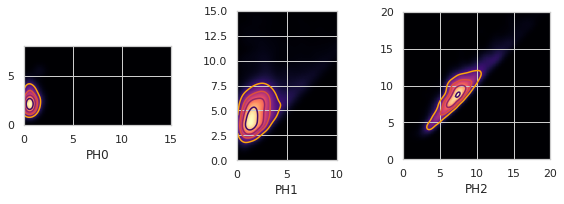

U937_7%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


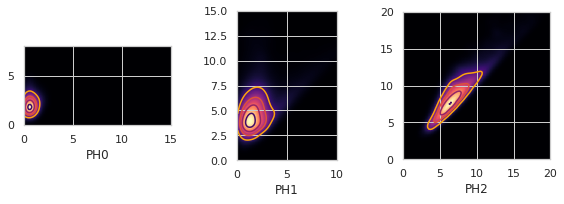

U937_8%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


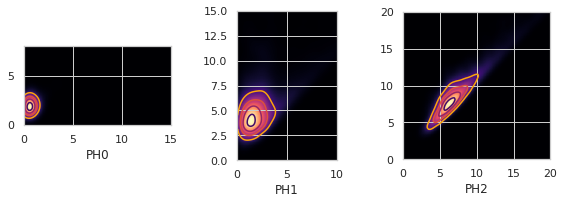

U937_10%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


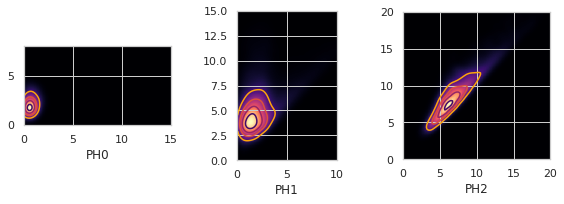

U937_10%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


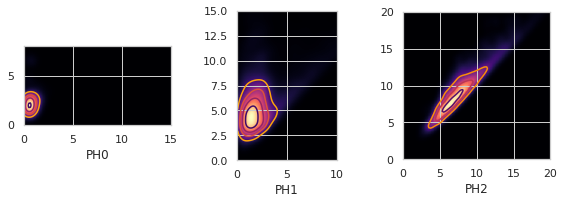

U937_10%(3)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


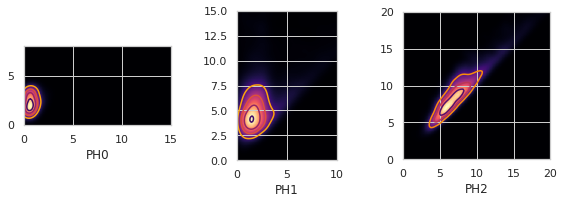

HL60_23%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


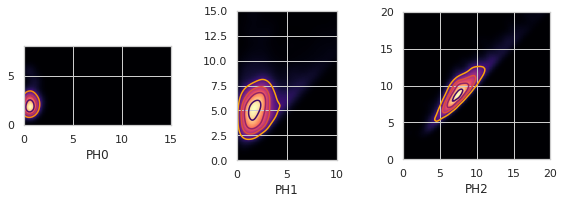

HL60_25%(1)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


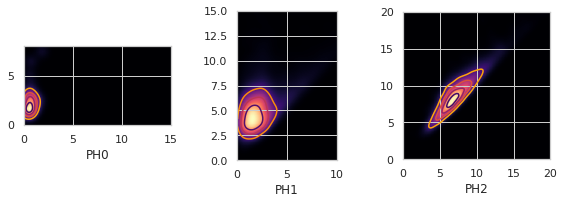

HL60_25%(2)
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


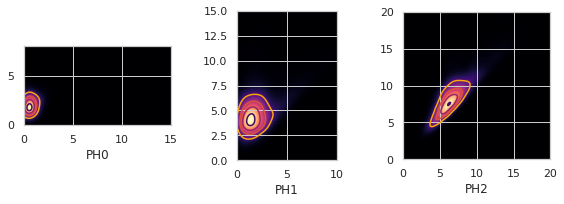

P1_10%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


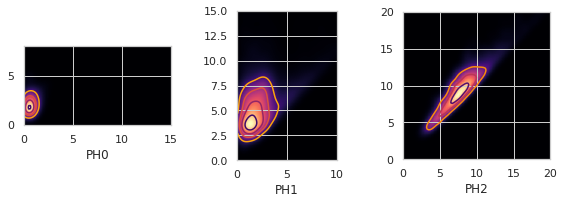

P1_40%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


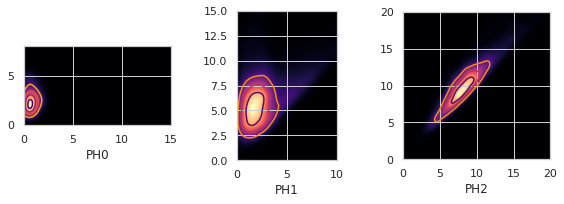

P1_44%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


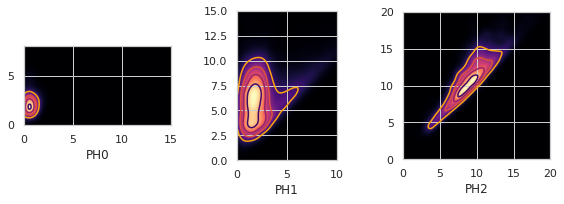

P1_51%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


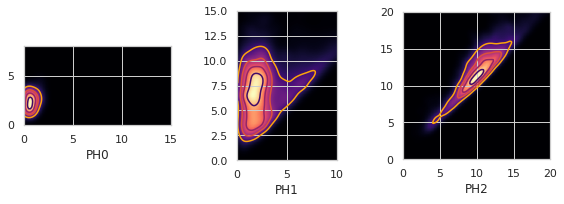

P1_60%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


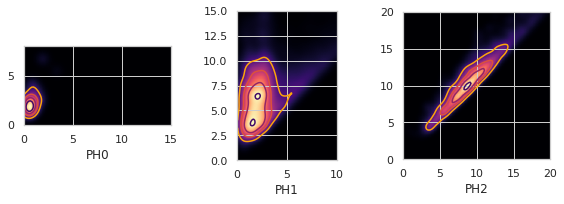

P1_76%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


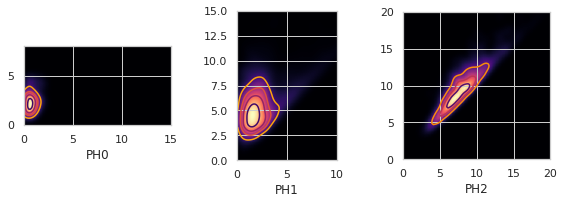

P2_59%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


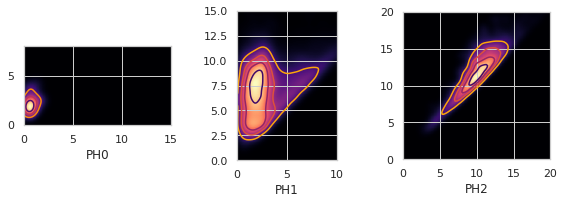

P2_88%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


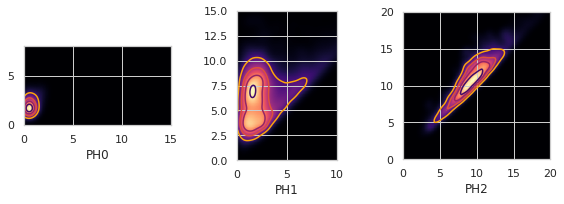

P2_90%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


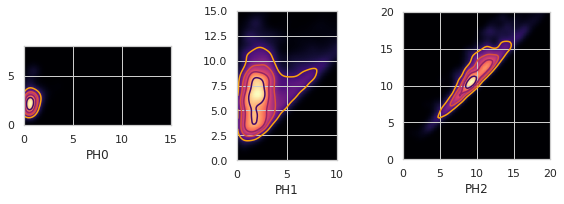

MNC_53%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


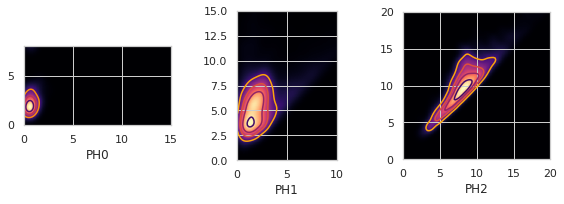

MNC_67%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


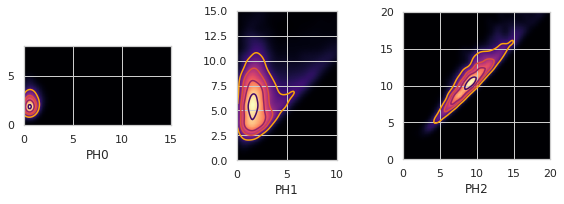

MNC_75%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


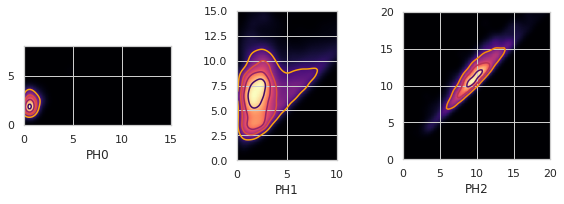

MNC_86%
excluded 0 pts belonging to PH0 NW
excluded low-persistence points


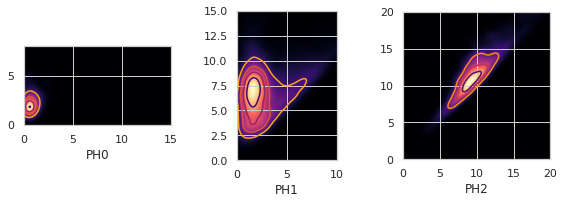

In [207]:
# plot all the diagrams
trunc_pds = []
for i in range(27):
    trunc_pds.append(pds[i][pds[i][:,1]-pds[i][:,0]>0.5,:])
for i in range(27):
    print(labels[i])
    heatmaps = extract_PH_heatmaps_single_sample(trunc_pds[i], THR, WEIGHTS, SIGMA, XLIMS, YLIMS, NB_BINS_PER_SIDE,
                                     discard_PH0_NW = True, option = 'keops') 
    contour_heatmaps(heatmaps, XLIMS, YLIMS) 

In [ ]:
def kl_divergence(model1, model2):
    x = np.arange(-10,10,.1)
    y = np.arange(-5,15,.1)
    xx,yy = np.meshgrid(x,y)
    x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

    p1 = model1.probability(x_).reshape(len(x),len(y))
    p2 = model2.probability(x_).reshape(len(x),len(y))
     
    p1 = p1/np.sum(p1)
    p2 = p2/np.sum(p2)
    
    return np.sum(p1*(np.log(p1/p2))) 

# Hellinger distance
def Hellinger(model1, model2):
    x = np.arange(-10,10,.1)
    y = np.arange(-5,15,.1)
    xx,yy = np.meshgrid(x,y)
    x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

    p1 = model1.probability(x_).reshape(len(x),len(y))
    p2 = model2.probability(x_).reshape(len(x),len(y))
     
    p1 = p1/np.sum(p1)
    p2 = p2/np.sum(p2)
    
    summation = np.sum(np.square(np.sqrt(p1)-np.sqrt(p2)))   
    
    return np.sqrt(summation)/np.sqrt(2)
  

colours_of_interest = []
for i in phases_of_interest:
    if i == 0:
        colours_of_interest.append("green")
    elif i == 1:
        colours_of_interest.append("orange")
    elif i == 2:
        colours_of_interest.append("red")


# Determine optimal mixture size for PH0, PH1 and PH2

In [8]:
# load modules and get ph0_sw
import pomegranate
import sklearn

import torch

from pomegranate.gmm import GeneralMixtureModel
from pomegranate.distributions import *


# PH0

In [77]:
# model sizes ranging from 2 to 20 (19 in total)

models = [] # list of 19 x 3 models
times = [] # 19 times
ind_loglikelihoods = [] # list of 19 x 3 x ... individual loglikelihoods
bics = [] # list of 19 x 3 x ... individual bics
bic_tols = [] # sum bic for each model size
# we are really only interested in "times" and "bic_tols"
for i in range(19):
    # start timing
    start_time = time.time()
    # fit model for phase 0
    model0 = GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase0_ph0_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model0.fit(
        X=phase0_ph0_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase0_ph0_pts[:,1]-phase0_ph0_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .0001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model1 = GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase1_ph0_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model1.fit(
        X=phase1_ph0_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase1_ph0_pts[:,1]-phase1_ph0_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .0001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model2 = GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase2_ph0_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model2.fit(
        X=phase2_ph0_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase2_ph0_pts[:,1]-phase2_ph0_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .0001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    times.append(time.time()-start_time)
    models.append([model0,model1,model2])
    
    # compute loglikelihoods on individual sample level
    
    # phase 0
    bic_sum = 0
    loglike_record0 = []
    bic_record0 = []
    for datas in phase0_ph0:
        n = datas.shape[0]
        loglike = np.sum(model0.log_probability(datas))
        loglike_record0.append(loglike)
        bic_record0.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record0)
    
    # phase 1
    loglike_record1 = []
    bic_record1 = []
    for datas in phase1_ph0:
        n = datas.shape[0]
        loglike = np.sum(model1.log_probability(datas))
        loglike_record1.append(loglike)
        bic_record1.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record1)
    
    # phase 2
    loglike_record2 = []
    bic_record2 = []
    for datas in phase2_ph0:
        n = datas.shape[0]
        loglike = np.sum(model2.log_probability(datas))
        loglike_record2.append(loglike)
        bic_record2.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record2)
    
    # appending...
    ind_loglikelihoods.append([loglike_record0, loglike_record1, loglike_record2])
    bics.append([bic_record0, bic_record1, bic_record2])
    bic_tols.append(bic_sum)
    
    print("model size = {} - done".format(i+2))
    

model size = 2 - done
model size = 3 - done
model size = 4 - done
model size = 5 - done
model size = 6 - done
model size = 7 - done
model size = 8 - done
model size = 9 - done
model size = 10 - done
model size = 11 - done
model size = 12 - done
model size = 13 - done
model size = 14 - done
model size = 15 - done
model size = 16 - done
model size = 17 - done
model size = 18 - done
model size = 19 - done
model size = 20 - done


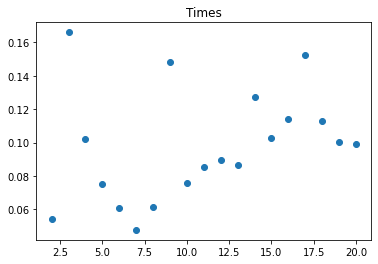

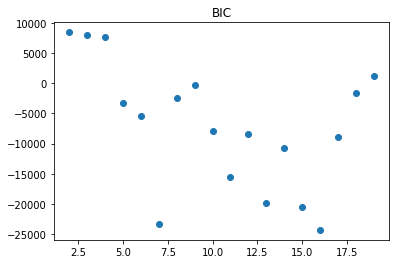

In [79]:
x_val = [i+2 for i in range(19)]
plt.scatter(x_val, times)
plt.title("Times")
plt.show()

plt.scatter(x_val, bic_tols)
plt.title("BIC")
plt.show()


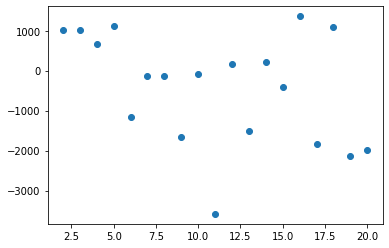

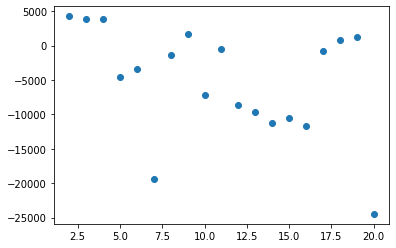

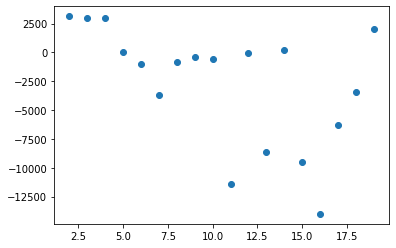

In [80]:
plt.scatter(x_val, [sum(bics[i][0]) for i in range(19)])
plt.show()

plt.scatter(x_val, [sum(bics[i][1]) for i in range(19)])
plt.show()

plt.scatter(x_val, [sum(bics[i][2]) for i in range(19)])
plt.show()

Optimal mixture size around 7: 6,7,7 for the three phase models

When fitting models with mixture size 6 or 7 there often are Gaussians with zero weight, hence we opt for the less optimal mixture size of 5,6,7

Studying the distribution of mixture weights, sizes 3,4,and 5 are deem more appropriate to prevent zero weightings

Note that for large sample size, larger mixture size may result in the covariance matrix being singular

### Take bootstrap samples and determine model fit

In [251]:
# shuffle each array and take 50-50 split
ph0_train = []
ph0_test = []
for i in range(27):
    current_ph0 = ph0[i]
    n_tot = current_ph0.shape[0]
    n_val = int(np.floor(n_tot*0.5))
    np.random.shuffle(current_ph0)
    ph0_train.append(current_ph0[:n_val,:])
    ph0_test.append(current_ph0[n_val:,:])

In [252]:
phase0_train = [ph0_train[x] for x in phase0_index]
phase1_train = [ph0_train[x] for x in phase1_index]
phase2_train = [ph0_train[x] for x in phase2_index]

# stacking the training pts together
phase0_train_pts = np.vstack(phase0_train)
phase1_train_pts = np.vstack(phase1_train)
phase2_train_pts = np.vstack(phase2_train)

phase0_test = [ph0_test[x] for x in phase0_index]
phase1_test = [ph0_test[x] for x in phase1_index]
phase2_test = [ph0_test[x] for x in phase2_index]

# stacking the test pts together
phase0_test_pts = np.vstack(phase0_test)
phase1_test_pts = np.vstack(phase1_test)
phase2_test_pts = np.vstack(phase2_test)

In [282]:
# fit an initial model using half of the data as starting parameters
# take a bootstrap of size half the data
n0 = phase0_train_pts.shape[0]
n1 = phase1_train_pts.shape[0]
n2 = phase2_train_pts.shape[0]

choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/2)), replace=True)
x0 = phase0_train_pts[choice0,:]

choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/2)), replace=True)
x1 = phase1_train_pts[choice1,:]

choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/2)), replace=True)
x2 = phase2_train_pts[choice2,:]


model0 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=3,     #Required if single function passed as first arg
    X=x0,     #data format: each row is a point-coordinate, each column is a dimension
    )
model0.fit(
    X=x0,         #data format: each row is a coordinate, each column is a dimension
    weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model1 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=4,     #Required if single function passed as first arg
    X=x1,     #data format: each row is a point-coordinate, each column is a dimension
    )
model1.fit(
    X=x1,         #data format: each row is a coordinate, each column is a dimension
    weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model2 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=5,     #Required if single function passed as first arg
    X=x2,     #data format: each row is a point-coordinate, each column is a dimension
    )
model2.fit(
    X=x2,         #data format: each row is a coordinate, each column is a dimension
    weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );


In [283]:
# record the following
weights0 = []
means0 = []
variances0 = []

weights1 = []
means1 = []
variances1 = []

weights2 = []
means2 = []
variances2 = []

# take 50 bootstrap samples each being a quarter of the original size
for t in range(50):
    
    choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/4)), replace=True)
    x0 = phase0_train_pts[choice0,:]

    choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/4)), replace=True)
    x1 = phase1_train_pts[choice1,:]

    choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/4)), replace=True)
    x2 = phase2_train_pts[choice2,:]
    
    phase0_model = model0
    phase1_model = model1
    phase2_model = model2
    
    # update the model using the bootstrap samples
    phase0_model.fit(
        X=x0,         #data format: each row is a coordinate, each column is a dimension
        weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase1_model.fit(
        X=x1,         #data format: each row is a coordinate, each column is a dimension
        weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase2_model.fit(
        X=x2,         #data format: each row is a coordinate, each column is a dimension
        weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    # record model parameters
    weights0.append(np.exp(phase0_model.weights))
    means0.append([phase0_model.distributions[j].parameters[0] for j in range(3)])
    variances0.append([phase0_model.distributions[j].parameters[1] for j in range(3)])

    weights1.append(np.exp(phase1_model.weights))
    means1.append([phase1_model.distributions[j].parameters[0] for j in range(4)])
    variances1.append([phase1_model.distributions[j].parameters[1] for j in range(4)])
    
    weights2.append(np.exp(phase2_model.weights))
    means2.append([phase2_model.distributions[j].parameters[0] for j in range(5)])
    variances2.append([phase2_model.distributions[j].parameters[1] for j in range(5)])
    
    print("{}-th bootstrap complete".format(t))
    
    
    

0-th bootstrap complete
1-th bootstrap complete
2-th bootstrap complete
3-th bootstrap complete
4-th bootstrap complete
5-th bootstrap complete
6-th bootstrap complete
7-th bootstrap complete
8-th bootstrap complete
9-th bootstrap complete
10-th bootstrap complete
11-th bootstrap complete
12-th bootstrap complete
13-th bootstrap complete
14-th bootstrap complete
15-th bootstrap complete
16-th bootstrap complete
17-th bootstrap complete
18-th bootstrap complete
19-th bootstrap complete
20-th bootstrap complete
21-th bootstrap complete
22-th bootstrap complete
23-th bootstrap complete
24-th bootstrap complete
25-th bootstrap complete
26-th bootstrap complete
27-th bootstrap complete
28-th bootstrap complete
29-th bootstrap complete
30-th bootstrap complete
31-th bootstrap complete
32-th bootstrap complete
33-th bootstrap complete
34-th bootstrap complete
35-th bootstrap complete
36-th bootstrap complete
37-th bootstrap complete
38-th bootstrap complete
39-th bootstrap complete
40-th boot

In [284]:
# Take average of the parameters
mu0 = np.mean(np.array(means0), axis=0)
mu1 = np.mean(np.array(means1), axis=0)
mu2 = np.mean(np.array(means2), axis=0)

w0 = np.mean(np.array(weights0), axis=0)
w1 = np.mean(np.array(weights1), axis=0)
w2 = np.mean(np.array(weights2), axis=0)
w0 = w0/np.sum(w0)
w1 = w1/np.sum(w1)
w2 = w2/np.sum(w2)

cov0 = np.mean(np.array(variances0), axis=0)
cov1 = np.mean(np.array(variances1), axis=0)
cov2 = np.mean(np.array(variances2), axis=0)

In [285]:

# construct the Gaussian mixtures
# phase 0
mixture0 = [MultivariateGaussianDistribution(mu0[i], cov0[i]) for i in range(3)]
Model0 = GeneralMixtureModel(mixture0 , weights=w0)

# phase 1
mixture1 = [MultivariateGaussianDistribution(mu1[i], cov1[i]) for i in range(4)]
Model1 = GeneralMixtureModel(mixture1 , weights=w1)

# phase 2
mixture2 = [MultivariateGaussianDistribution(mu2[i], cov2[i]) for i in range(5)]
Model2 = GeneralMixtureModel(mixture2 , weights=w2)




In [286]:
def kl_divergence(model1, model2, ph):
    # ph to determine size of mesh grid
    if ph==0:
        x = np.arange(0, 15,.1)
        y = np.arange(0, 8,.1)
    elif ph==1:
        x = np.arange(0, 10,.1)
        y = np.arange(0, 15,.1)
    else:
        x = np.arange(0, 20,.1)
        y = np.arange(0, 20,.1)
        
    xx,yy = np.meshgrid(x,y)
    x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

    p1 = model1.probability(x_).reshape(len(x),len(y))
    p2 = model2.probability(x_).reshape(len(x),len(y))
     
    p1 = p1/np.sum(p1)
    p2 = p2/np.sum(p2)
    
    return np.sum(p1*(np.log(p1/p2))) 

# Hellinger distance
def Hellinger(model1, model2, ph):
    if ph==0:
        x = np.arange(0, 15,.1)
        y = np.arange(0, 8,.1)
    elif ph==1:
        x = np.arange(0, 10,.1)
        y = np.arange(0, 15,.1)
    else:
        x = np.arange(0, 20,.1)
        y = np.arange(0, 20,.1)
        
    xx,yy = np.meshgrid(x,y)
    x_ = np.array(list(zip(xx.flatten(), yy.flatten())))

    p1 = model1.probability(x_).reshape(len(x),len(y))
    p2 = model2.probability(x_).reshape(len(x),len(y))
     
    p1 = p1/np.sum(p1)
    p2 = p2/np.sum(p2)
    
    summation = np.sum(np.square(np.sqrt(p1)-np.sqrt(p2)))   
    
    return np.sqrt(summation)/np.sqrt(2)
  

colours_of_interest = []
for i in phases_of_interest:
    if i == 0:
        colours_of_interest.append("green")
    elif i == 1:
        colours_of_interest.append("orange")
    elif i == 2:
        colours_of_interest.append("red")

In [287]:
h0s = [[] for i in range(27)]
h1s = [[] for i in range(27)]
h2s = [[] for i in range(27)]

# size of each ph diagram
sizes = [item.shape[0] for item in ph0_test]

for t in range(50):
    # subsample
    cluster_models = []
    for i in range(27):
        n = sizes[i]
        indices = np.random.choice([i for i in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=3,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        cluster_models.append(model)
                
    for i in range(27):
        h0s[i].append(Hellinger(Model0, cluster_models[i],0))
        h1s[i].append(Hellinger(Model1, cluster_models[i],1))
        h2s[i].append(Hellinger(Model2, cluster_models[i],2))
        
    print("{}-th bootstrap done".format(t))

/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


0-th bootstrap done
1-th bootstrap done
2-th bootstrap done
3-th bootstrap done
4-th bootstrap done
5-th bootstrap done
6-th bootstrap done
7-th bootstrap done
8-th bootstrap done
9-th bootstrap done
10-th bootstrap done
11-th bootstrap done
12-th bootstrap done
13-th bootstrap done
14-th bootstrap done
15-th bootstrap done
16-th bootstrap done
17-th bootstrap done
18-th bootstrap done
19-th bootstrap done
20-th bootstrap done
21-th bootstrap done
22-th bootstrap done
23-th bootstrap done
24-th bootstrap done
25-th bootstrap done
26-th bootstrap done
27-th bootstrap done
28-th bootstrap done
29-th bootstrap done
30-th bootstrap done
31-th bootstrap done
32-th bootstrap done
33-th bootstrap done
34-th bootstrap done
35-th bootstrap done
36-th bootstrap done
37-th bootstrap done
38-th bootstrap done
39-th bootstrap done
40-th bootstrap done
41-th bootstrap done
42-th bootstrap done
43-th bootstrap done
44-th bootstrap done
45-th bootstrap done
46-th bootstrap done
47-th bootstrap done
48

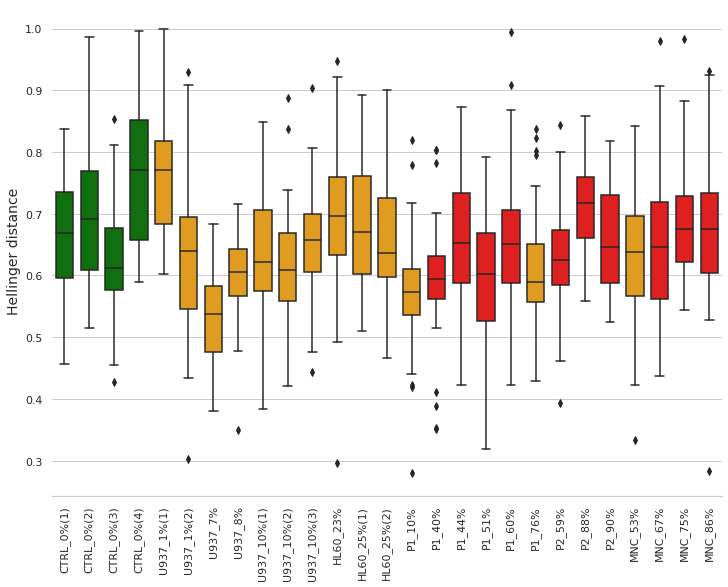

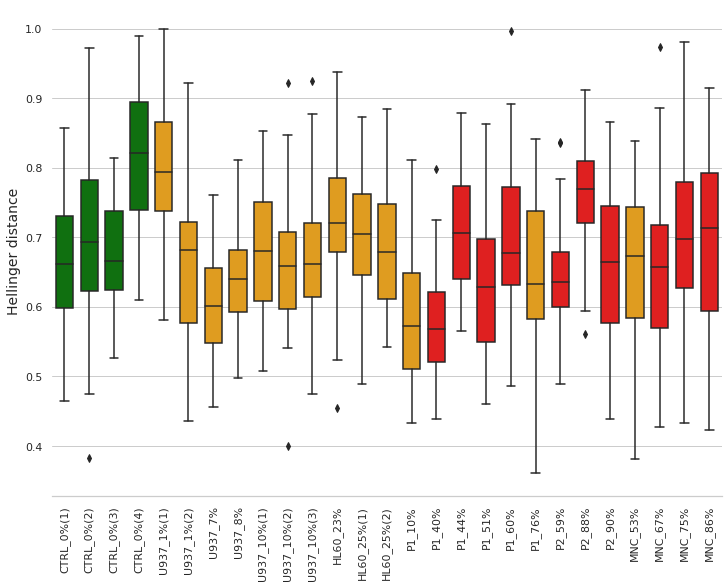

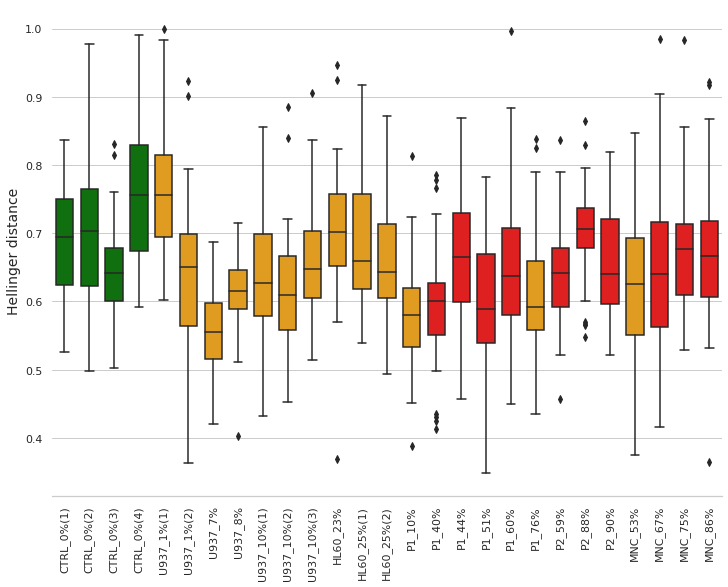

In [288]:
import numpy as np
import pandas as pd
import seaborn as sns

df_h0 = pd.DataFrame(h0s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h0.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

########################################################
df_h1 = pd.DataFrame(h1s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h1.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

#########################################################
df_h2 = pd.DataFrame(h2s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h2.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

In [289]:
# record the accuracy for each sample
accuracies = [0 for i in range(27)]

for i in range(27):
    # 50 bootstrap iterations
    correct = 0
    for j in range(50):
        # sample
        n = sizes[i]
        indices = np.random.choice([l for l in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        # model 
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=6,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        
        # compute the hellinger distance to the 3 models
        hdist = [Hellinger(Model0, model,0), Hellinger(Model1, model,1), Hellinger(Model2, model,2)]
        pred = hdist.index(min(hdist))
        if pred == phases_of_interest[i]:
            correct +=1
    print("{} is done".format(i))
    accuracies[i] = correct

/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


0 is done
1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done


In [290]:
cel_labels = []
for item in phases_of_interest:
    if item==0:
        cel_labels.append('CTRL')
    elif item==1:
        cel_labels.append('EARLY')
    elif item==2:
        cel_labels.append('LATE')
print(cel_labels)

['CTRL', 'CTRL', 'CTRL', 'CTRL', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'LATE', 'LATE', 'LATE', 'LATE', 'EARLY', 'LATE', 'LATE', 'LATE', 'EARLY', 'LATE', 'LATE', 'LATE']


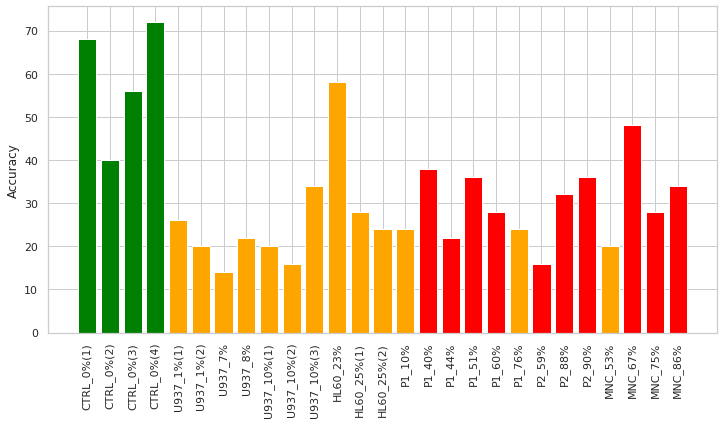

In [291]:
fig, ax = plt.subplots(figsize = (12,6))

for i in range(27):
    ax.bar(labels[i], (np.array(accuracies)*2)[i], color=colours_of_interest[i], label=cel_labels[i])
#plt.legend()
plt.xticks(rotation= 90)
plt.ylabel("Accuracy")
plt.show()

In [292]:
print("Average accuracy: ",sum(accuracies)/(50*27))

Average accuracy:  0.3274074074074074


# PH1

In [81]:
# model sizes ranging from 2 to 20 (19 in total)

models = [] # list of 19 x 3 models
times = [] # 19 times
ind_loglikelihoods = [] # list of 19 x 3 x ... individual loglikelihoods
bics = [] # list of 19 x 3 x ... individual bics
bic_tols = [] # sum bic for each model size
# we are really only interested in "times" and "bic_tols"
for i in range(19):
    # start timing
    start_time = time.time()
    # fit model for phase 0
    model0 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase0_ph1_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model0.fit(
        X=phase0_ph1_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase0_ph1_pts[:,1]-phase0_ph1_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model1 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase1_ph1_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model1.fit(
        X=phase1_ph1_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase1_ph1_pts[:,1]-phase1_ph1_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model2 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase2_ph1_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model2.fit(
        X=phase2_ph1_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase2_ph1_pts[:,1]-phase2_ph1_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    times.append(time.time()-start_time)
    models.append([model0,model1,model2])
    
    # compute loglikelihoods on individual sample level
    
    # phase 0
    bic_sum = 0
    loglike_record0 = []
    bic_record0 = []
    for datas in phase0_ph1:
        n = datas.shape[0]
        loglike = np.sum(model0.log_probability(datas))
        loglike_record0.append(loglike)
        bic_record0.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record0)
    
    # phase 1
    loglike_record1 = []
    bic_record1 = []
    for datas in phase1_ph1:
        n = datas.shape[0]
        loglike = np.sum(model1.log_probability(datas))
        loglike_record1.append(loglike)
        bic_record1.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record1)
    
    # phase 2
    loglike_record2 = []
    bic_record2 = []
    for datas in phase2_ph1:
        n = datas.shape[0]
        loglike = np.sum(model2.log_probability(datas))
        loglike_record2.append(loglike)
        bic_record2.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record2)
    
    # appending...
    ind_loglikelihoods.append([loglike_record0, loglike_record1, loglike_record2])
    bics.append([bic_record0, bic_record1, bic_record2])
    bic_tols.append(bic_sum)
    
    print("model size = {} - done".format(i+2))
    

model size = 2 - done
model size = 3 - done
model size = 4 - done
model size = 5 - done
model size = 6 - done
model size = 7 - done
model size = 8 - done
model size = 9 - done
model size = 10 - done
model size = 11 - done
model size = 12 - done
model size = 13 - done
model size = 14 - done
model size = 15 - done
model size = 16 - done
model size = 17 - done
model size = 18 - done
model size = 19 - done
model size = 20 - done


In [91]:
bic0 = [sum(bics[i][0]) for i in range(19)]
bic1 = [sum(bics[i][1]) for i in range(19)]
bic2 = [sum(bics[i][2]) for i in range(19)]

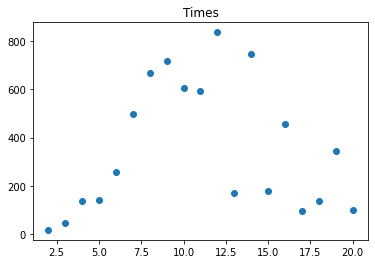

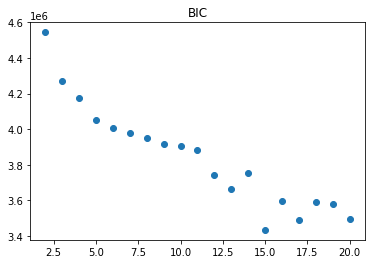

In [92]:
x_val = [i+2 for i in range(19)]
plt.scatter(x_val, times)
plt.title("Times")
plt.show()

plt.scatter(x_val, bic_tols)
plt.title("BIC")
plt.show()


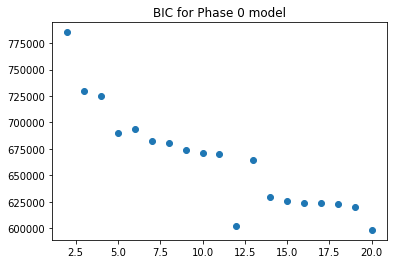

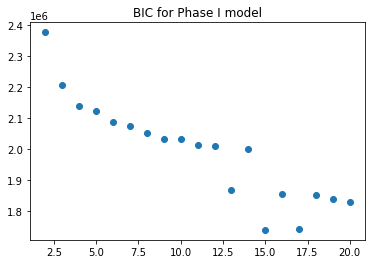

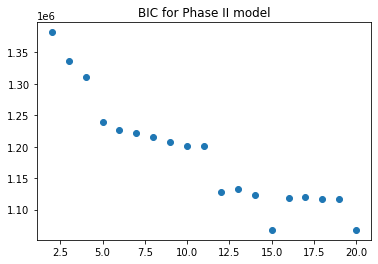

In [93]:
plt.scatter(x_val, bic0)
plt.title("BIC for Phase 0 model")
plt.show()

plt.scatter(x_val, bic1)
plt.title("BIC for Phase I model")
plt.show()

plt.scatter(x_val, bic2)
plt.title("BIC for Phase II model")
plt.show()

Optimal mixture size: 3, 4, 5 for phases O, I and II
    
### Take bootstrap samples and evaluate model fit

In [293]:
# shuffle each array and take 50-50 split
ph1_train = []
ph1_test = []
for i in range(27):
    current_ph1 = ph1[i]
    n_tot = current_ph1.shape[0]
    n_val = int(np.floor(n_tot*0.5))
    np.random.shuffle(current_ph1)
    ph1_train.append(current_ph1[:n_val,:])
    ph1_test.append(current_ph1[n_val:,:])

In [294]:
phase0_train = [ph1_train[x] for x in phase0_index]
phase1_train = [ph1_train[x] for x in phase1_index]
phase2_train = [ph1_train[x] for x in phase2_index]

# stacking the training pts together
phase0_train_pts = np.vstack(phase0_train)
phase1_train_pts = np.vstack(phase1_train)
phase2_train_pts = np.vstack(phase2_train)

phase0_test = [ph1_test[x] for x in phase0_index]
phase1_test = [ph1_test[x] for x in phase1_index]
phase2_test = [ph1_test[x] for x in phase2_index]

# stacking the test pts together
phase0_test_pts = np.vstack(phase0_test)
phase1_test_pts = np.vstack(phase1_test)
phase2_test_pts = np.vstack(phase2_test)

In [295]:
# fit an initial model using half of the data as starting parameters
# take a bootstrap of size half the data
n0 = phase0_train_pts.shape[0]
n1 = phase1_train_pts.shape[0]
n2 = phase2_train_pts.shape[0]

choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/2)), replace=True)
x0 = phase0_train_pts[choice0,:]

choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/2)), replace=True)
x1 = phase1_train_pts[choice1,:]

choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/2)), replace=True)
x2 = phase2_train_pts[choice2,:]


model0 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=3,     #Required if single function passed as first arg
    X=x0,     #data format: each row is a point-coordinate, each column is a dimension
    )
model0.fit(
    X=x0,         #data format: each row is a coordinate, each column is a dimension
    weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model1 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=4,     #Required if single function passed as first arg
    X=x1,     #data format: each row is a point-coordinate, each column is a dimension
    )
model1.fit(
    X=x1,         #data format: each row is a coordinate, each column is a dimension
    weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model2 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=5,     #Required if single function passed as first arg
    X=x2,     #data format: each row is a point-coordinate, each column is a dimension
    )
model2.fit(
    X=x2,         #data format: each row is a coordinate, each column is a dimension
    weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );


In [296]:
# record the following
weights0 = []
means0 = []
variances0 = []

weights1 = []
means1 = []
variances1 = []

weights2 = []
means2 = []
variances2 = []

# take 50 bootstrap samples each being a quarter of the original size
for t in range(50):
    
    choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/4)), replace=True)
    x0 = phase0_train_pts[choice0,:]

    choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/4)), replace=True)
    x1 = phase1_train_pts[choice1,:]

    choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/4)), replace=True)
    x2 = phase2_train_pts[choice2,:]
    
    phase0_model = model0
    phase1_model = model1
    phase2_model = model2
    
    # update the model using the bootstrap samples
    phase0_model.fit(
        X=x0,         #data format: each row is a coordinate, each column is a dimension
        weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase1_model.fit(
        X=x1,         #data format: each row is a coordinate, each column is a dimension
        weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase2_model.fit(
        X=x2,         #data format: each row is a coordinate, each column is a dimension
        weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    # record model parameters
    weights0.append(np.exp(phase0_model.weights))
    means0.append([phase0_model.distributions[j].parameters[0] for j in range(3)])
    variances0.append([phase0_model.distributions[j].parameters[1] for j in range(3)])

    weights1.append(np.exp(phase1_model.weights))
    means1.append([phase1_model.distributions[j].parameters[0] for j in range(4)])
    variances1.append([phase1_model.distributions[j].parameters[1] for j in range(4)])
    
    weights2.append(np.exp(phase2_model.weights))
    means2.append([phase2_model.distributions[j].parameters[0] for j in range(5)])
    variances2.append([phase2_model.distributions[j].parameters[1] for j in range(5)])
    
    print("{}-th bootstrap complete".format(t))
    
    
    

0-th bootstrap complete
1-th bootstrap complete
2-th bootstrap complete
3-th bootstrap complete
4-th bootstrap complete
5-th bootstrap complete
6-th bootstrap complete
7-th bootstrap complete
8-th bootstrap complete
9-th bootstrap complete
10-th bootstrap complete
11-th bootstrap complete
12-th bootstrap complete
13-th bootstrap complete
14-th bootstrap complete
15-th bootstrap complete
16-th bootstrap complete
17-th bootstrap complete
18-th bootstrap complete
19-th bootstrap complete
20-th bootstrap complete
21-th bootstrap complete
22-th bootstrap complete
23-th bootstrap complete
24-th bootstrap complete
25-th bootstrap complete
26-th bootstrap complete
27-th bootstrap complete
28-th bootstrap complete
29-th bootstrap complete
30-th bootstrap complete
31-th bootstrap complete
32-th bootstrap complete
33-th bootstrap complete
34-th bootstrap complete
35-th bootstrap complete
36-th bootstrap complete
37-th bootstrap complete
38-th bootstrap complete
39-th bootstrap complete
40-th boot

In [297]:
# Take average of the parameters
mu0 = np.mean(np.array(means0), axis=0)
mu1 = np.mean(np.array(means1), axis=0)
mu2 = np.mean(np.array(means2), axis=0)

w0 = np.mean(np.array(weights0), axis=0)
w1 = np.mean(np.array(weights1), axis=0)
w2 = np.mean(np.array(weights2), axis=0)
w0 = w0/np.sum(w0)
w1 = w1/np.sum(w1)
w2 = w2/np.sum(w2)

cov0 = np.mean(np.array(variances0), axis=0)
cov1 = np.mean(np.array(variances1), axis=0)
cov2 = np.mean(np.array(variances2), axis=0)

# construct the Gaussian mixtures
# phase 0
mixture0 = [MultivariateGaussianDistribution(mu0[i], cov0[i]) for i in range(3)]
Model0 = GeneralMixtureModel(mixture0 , weights=w0)

# phase 1
mixture1 = [MultivariateGaussianDistribution(mu1[i], cov1[i]) for i in range(4)]
Model1 = GeneralMixtureModel(mixture1 , weights=w1)

# phase 2
mixture2 = [MultivariateGaussianDistribution(mu2[i], cov2[i]) for i in range(5)]
Model2 = GeneralMixtureModel(mixture2 , weights=w2)




In [298]:
h0s = [[] for i in range(27)]
h1s = [[] for i in range(27)]
h2s = [[] for i in range(27)]

# size of each ph diagram
sizes = [item.shape[0] for item in ph0_test]

for t in range(50):
    # subsample
    cluster_models = []
    for i in range(27):
        n = sizes[i]
        indices = np.random.choice([i for i in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=3,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        cluster_models.append(model)
        
    for i in range(27):
        h0s[i].append(Hellinger(Model0, cluster_models[i],0))
        h1s[i].append(Hellinger(Model1, cluster_models[i],1))
        h2s[i].append(Hellinger(Model2, cluster_models[i],2))
        
    print("{}-th bootstrap done".format(t))

0-th bootstrap done
1-th bootstrap done
2-th bootstrap done
3-th bootstrap done
4-th bootstrap done


/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


5-th bootstrap done
6-th bootstrap done
7-th bootstrap done
8-th bootstrap done
9-th bootstrap done
10-th bootstrap done
11-th bootstrap done
12-th bootstrap done
13-th bootstrap done
14-th bootstrap done
15-th bootstrap done
16-th bootstrap done
17-th bootstrap done
18-th bootstrap done
19-th bootstrap done
20-th bootstrap done
21-th bootstrap done
22-th bootstrap done
23-th bootstrap done
24-th bootstrap done
25-th bootstrap done
26-th bootstrap done
27-th bootstrap done
28-th bootstrap done
29-th bootstrap done
30-th bootstrap done
31-th bootstrap done
32-th bootstrap done
33-th bootstrap done
34-th bootstrap done
35-th bootstrap done
36-th bootstrap done
37-th bootstrap done
38-th bootstrap done
39-th bootstrap done
40-th bootstrap done
41-th bootstrap done
42-th bootstrap done
43-th bootstrap done
44-th bootstrap done
45-th bootstrap done
46-th bootstrap done
47-th bootstrap done
48-th bootstrap done
49-th bootstrap done


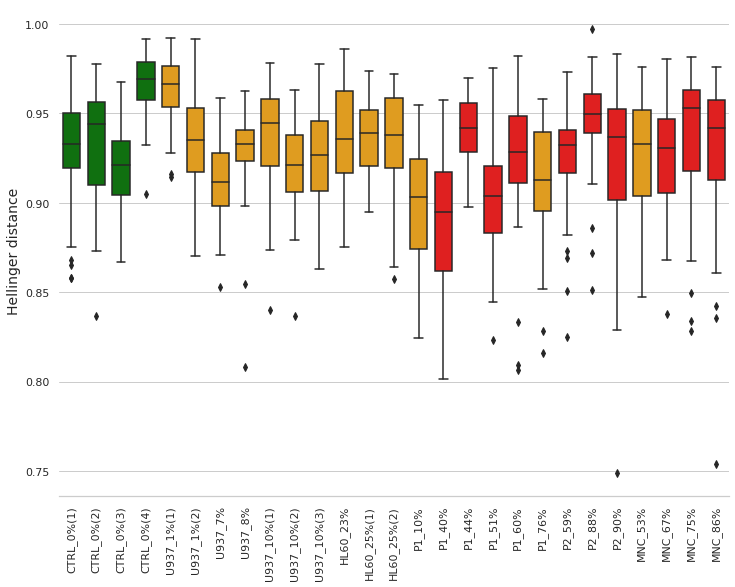

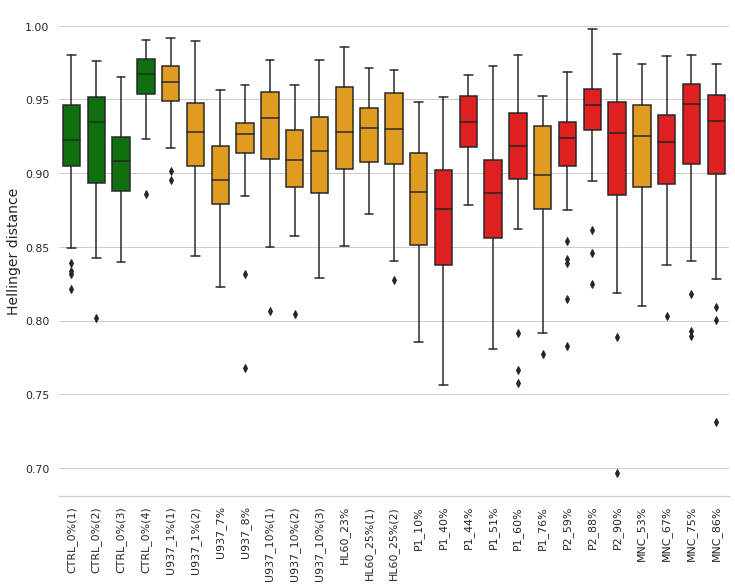

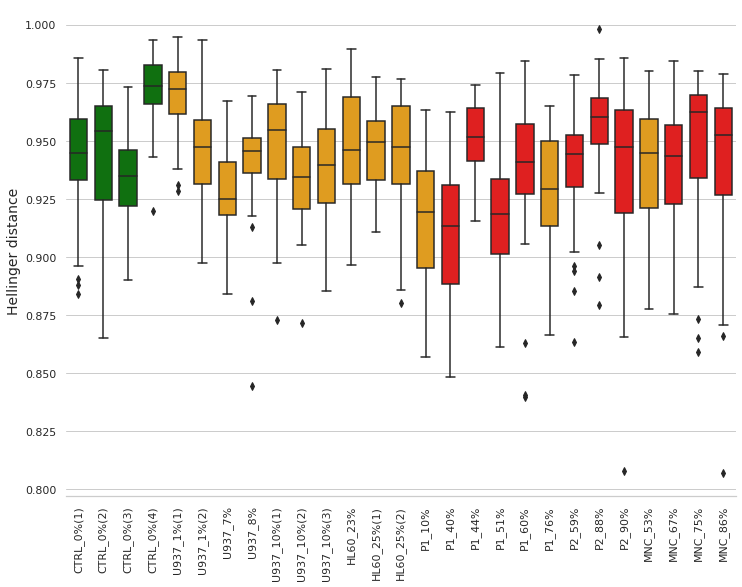

In [299]:
df_h0 = pd.DataFrame(h0s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h0.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

########################################################
df_h1 = pd.DataFrame(h1s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h1.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

#########################################################
df_h2 = pd.DataFrame(h2s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h2.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

In [304]:
# record the accuracy for each sample
accuracies = [0 for i in range(27)]

for i in range(27):
    # 50 bootstrap iterations
    correct = 0
    for j in range(50):
        # sample
        n = sizes[i]
        indices = np.random.choice([l for l in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        # model 
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=3,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        
        # compute the hellinger distance to the 3 models
        hdist = [Hellinger(Model0, model,0), Hellinger(Model1, model,1), Hellinger(Model2, model,2)]
        pred = hdist.index(min(hdist))
        if pred == phases_of_interest[i]:
            correct +=1
    print("{} is done".format(i))
    accuracies[i] = correct

0 is done
1 is done
2 is done


/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done


In [301]:
cel_labels = []
for item in phases_of_interest:
    if item==0:
        cel_labels.append('CTRL')
    elif item==1:
        cel_labels.append('EARLY')
    elif item==2:
        cel_labels.append('LATE')
print(cel_labels)

['CTRL', 'CTRL', 'CTRL', 'CTRL', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'EARLY', 'LATE', 'LATE', 'LATE', 'LATE', 'EARLY', 'LATE', 'LATE', 'LATE', 'EARLY', 'LATE', 'LATE', 'LATE']


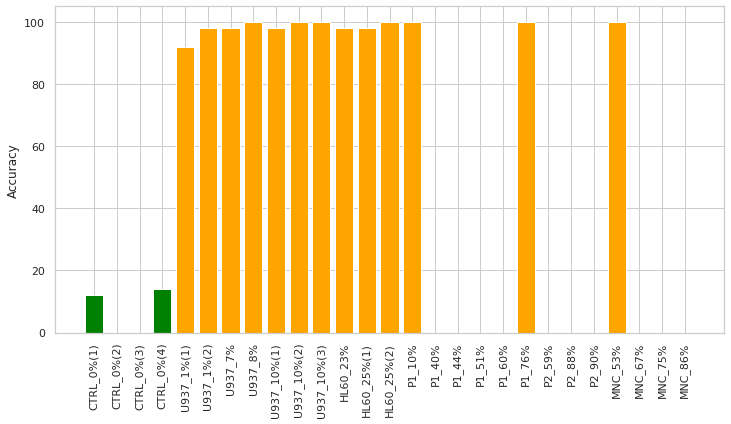

In [305]:
fig, ax = plt.subplots(figsize = (12,6))

for i in range(27):
    ax.bar(labels[i], (np.array(accuracies)*2)[i], color=colours_of_interest[i], label=cel_labels[i])
#plt.legend()
plt.xticks(rotation= 90)
plt.ylabel("Accuracy")
plt.show()

In [306]:
print("Average accuracy: ",sum(accuracies)/(50*27))

Average accuracy:  0.48444444444444446


# PH2

In [87]:
# model sizes ranging from 2 to 20 (19 in total)

models = [] # list of 19 x 3 models
times = [] # 19 times
ind_loglikelihoods = [] # list of 19 x 3 x ... individual loglikelihoods
bics = [] # list of 19 x 3 x ... individual bics
bic_tols = [] # sum bic for each model size
# we are really only interested in "times" and "bic_tols"
for i in range(19):
    # start timing
    start_time = time.time()
    # fit model for phase 0
    model0 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase0_ph2_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model0.fit(
        X=phase0_ph2_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase0_ph2_pts[:,1]-phase0_ph2_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model1 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase1_ph2_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model1.fit(
        X=phase1_ph2_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase1_ph2_pts[:,1]-phase1_ph2_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    model2 = pomegranate.gmm.GeneralMixtureModel.from_samples(
        pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
        n_components=i+2,     #Required if single function passed as first arg
        X=phase2_ph2_pts,     #data format: each row is a point-coordinate, each column is a dimension
        )
    model2.fit(
        X=phase2_ph2_pts,         #data format: each row is a coordinate, each column is a dimension
        weights = phase2_ph2_pts[:,1]-phase2_ph2_pts[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    times.append(time.time()-start_time)
    models.append([model0,model1,model2])
    
    # compute loglikelihoods on individual sample level
    
    # phase 0
    bic_sum = 0
    loglike_record0 = []
    bic_record0 = []
    for datas in phase0_ph1:
        n = datas.shape[0]
        loglike = np.sum(model0.log_probability(datas))
        loglike_record0.append(loglike)
        bic_record0.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record0)
    
    # phase 1
    loglike_record1 = []
    bic_record1 = []
    for datas in phase1_ph1:
        n = datas.shape[0]
        loglike = np.sum(model1.log_probability(datas))
        loglike_record1.append(loglike)
        bic_record1.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record1)
    
    # phase 2
    loglike_record2 = []
    bic_record2 = []
    for datas in phase2_ph1:
        n = datas.shape[0]
        loglike = np.sum(model2.log_probability(datas))
        loglike_record2.append(loglike)
        bic_record2.append(-2*loglike+math.log(n)*6*(i+2))
    bic_sum += sum(bic_record2)
    
    # appending...
    ind_loglikelihoods.append([loglike_record0, loglike_record1, loglike_record2])
    bics.append([bic_record0, bic_record1, bic_record2])
    bic_tols.append(bic_sum)
    
    print("model size = {} - done".format(i+2))
    

model size = 2 - done
model size = 3 - done
model size = 4 - done
model size = 5 - done
model size = 6 - done
model size = 7 - done
model size = 8 - done
model size = 9 - done
model size = 10 - done
model size = 11 - done
model size = 12 - done
model size = 13 - done
model size = 14 - done
model size = 15 - done
model size = 16 - done
model size = 17 - done
model size = 18 - done
model size = 19 - done
model size = 20 - done


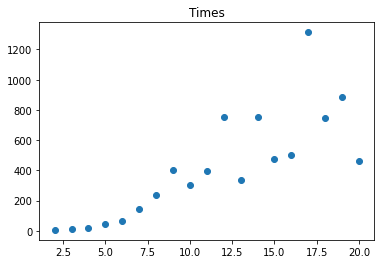

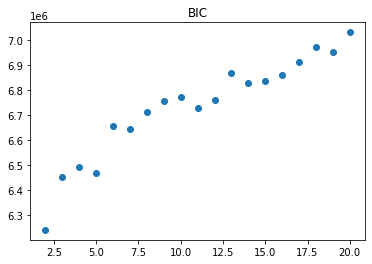

In [88]:
x_val = [i+2 for i in range(19)]
plt.scatter(x_val, times)
plt.title("Times")
plt.show()

plt.scatter(x_val, bic_tols)
plt.title("BIC")
plt.show()


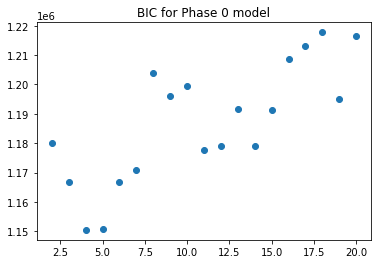

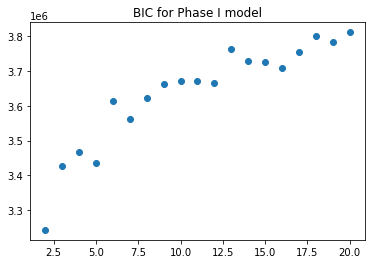

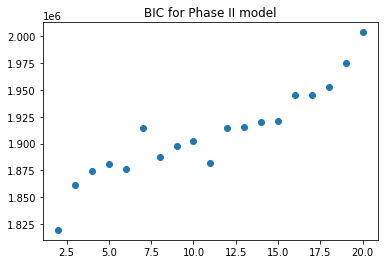

In [89]:
plt.scatter(x_val, [sum(bics[i][0]) for i in range(19)])
plt.title("BIC for Phase 0 model")
plt.show()

plt.scatter(x_val, [sum(bics[i][1]) for i in range(19)])
plt.title("BIC for Phase I model")
plt.show()

plt.scatter(x_val, [sum(bics[i][2]) for i in range(19)])
plt.title("BIC for Phase II model")
plt.show()

Optimal mixture size: 4,2,2 for phases O,I,II (or 2,2,2)
    
### Take bootstrap samples and evaluate model fit

In [307]:
# shuffle each array and take 50-50 split
ph2_train = []
ph2_test = []
for i in range(27):
    current_ph2 = ph2[i]
    n_tot = current_ph2.shape[0]
    n_val = int(np.floor(n_tot*0.5))
    np.random.shuffle(current_ph2)
    ph2_train.append(current_ph2[:n_val,:])
    ph2_test.append(current_ph2[n_val:,:])

In [308]:
phase0_train = [ph2_train[x] for x in phase0_index]
phase1_train = [ph2_train[x] for x in phase1_index]
phase2_train = [ph2_train[x] for x in phase2_index]

# stacking the training pts together
phase0_train_pts = np.vstack(phase0_train)
phase1_train_pts = np.vstack(phase1_train)
phase2_train_pts = np.vstack(phase2_train)

phase0_test = [ph2_test[x] for x in phase0_index]
phase1_test = [ph2_test[x] for x in phase1_index]
phase2_test = [ph2_test[x] for x in phase2_index]

# stacking the test pts together
phase0_test_pts = np.vstack(phase0_test)
phase1_test_pts = np.vstack(phase1_test)
phase2_test_pts = np.vstack(phase2_test)

In [309]:
# fit an initial model using half of the data as starting parameters
# take a bootstrap of size half the data
n0 = phase0_train_pts.shape[0]
n1 = phase1_train_pts.shape[0]
n2 = phase2_train_pts.shape[0]

choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/2)), replace=True)
x0 = phase0_train_pts[choice0,:]

choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/2)), replace=True)
x1 = phase1_train_pts[choice1,:]

choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/2)), replace=True)
x2 = phase2_train_pts[choice2,:]


model0 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=4,     #Required if single function passed as first arg
    X=x0,     #data format: each row is a point-coordinate, each column is a dimension
    )
model0.fit(
    X=x0,         #data format: each row is a coordinate, each column is a dimension
    weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model1 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=2,     #Required if single function passed as first arg
    X=x1,     #data format: each row is a point-coordinate, each column is a dimension
    )
model1.fit(
    X=x1,         #data format: each row is a coordinate, each column is a dimension
    weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );
model2 = pomegranate.gmm.GeneralMixtureModel.from_samples(
    pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
    n_components=2,     #Required if single function passed as first arg
    X=x2,     #data format: each row is a point-coordinate, each column is a dimension
    )
model2.fit(
    X=x2,         #data format: each row is a coordinate, each column is a dimension
    weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
    stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                            #   (sklearn likes better/slower fits than pomegrante by default)
    );


In [310]:
# record the following
weights0 = []
means0 = []
variances0 = []

weights1 = []
means1 = []
variances1 = []

weights2 = []
means2 = []
variances2 = []

# take 50 bootstrap samples each being a quarter of the original size
for t in range(50):
    
    choice0 = np.random.choice([i for i in range(n0)], size=int(np.floor(n0/4)), replace=True)
    x0 = phase0_train_pts[choice0,:]

    choice1 = np.random.choice([i for i in range(n1)], size=int(np.floor(n1/4)), replace=True)
    x1 = phase1_train_pts[choice1,:]

    choice2 = np.random.choice([i for i in range(n2)], size=int(np.floor(n2/4)), replace=True)
    x2 = phase2_train_pts[choice2,:]
    
    phase0_model = model0
    phase1_model = model1
    phase2_model = model2
    
    # update the model using the bootstrap samples
    phase0_model.fit(
        X=x0,         #data format: each row is a coordinate, each column is a dimension
        weights = x0[:,1]-x0[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase1_model.fit(
        X=x1,         #data format: each row is a coordinate, each column is a dimension
        weights = x1[:,1]-x1[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    phase2_model.fit(
        X=x2,         #data format: each row is a coordinate, each column is a dimension
        weights = x2[:,1]-x2[:,0],  #List of weights. One for each point-coordinate
        stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                #   (sklearn likes better/slower fits than pomegrante by default)
        )
    # record model parameters
    weights0.append(np.exp(phase0_model.weights))
    means0.append([phase0_model.distributions[j].parameters[0] for j in range(4)])
    variances0.append([phase0_model.distributions[j].parameters[1] for j in range(4)])

    weights1.append(np.exp(phase1_model.weights))
    means1.append([phase1_model.distributions[j].parameters[0] for j in range(2)])
    variances1.append([phase1_model.distributions[j].parameters[1] for j in range(2)])
    
    weights2.append(np.exp(phase2_model.weights))
    means2.append([phase2_model.distributions[j].parameters[0] for j in range(2)])
    variances2.append([phase2_model.distributions[j].parameters[1] for j in range(2)])
    
    print("{}-th bootstrap complete".format(t))
    
    
    

0-th bootstrap complete
1-th bootstrap complete
2-th bootstrap complete
3-th bootstrap complete
4-th bootstrap complete
5-th bootstrap complete
6-th bootstrap complete
7-th bootstrap complete
8-th bootstrap complete
9-th bootstrap complete
10-th bootstrap complete
11-th bootstrap complete
12-th bootstrap complete
13-th bootstrap complete
14-th bootstrap complete
15-th bootstrap complete
16-th bootstrap complete
17-th bootstrap complete
18-th bootstrap complete
19-th bootstrap complete
20-th bootstrap complete
21-th bootstrap complete
22-th bootstrap complete
23-th bootstrap complete
24-th bootstrap complete
25-th bootstrap complete
26-th bootstrap complete
27-th bootstrap complete
28-th bootstrap complete
29-th bootstrap complete
30-th bootstrap complete
31-th bootstrap complete
32-th bootstrap complete
33-th bootstrap complete
34-th bootstrap complete
35-th bootstrap complete
36-th bootstrap complete
37-th bootstrap complete
38-th bootstrap complete
39-th bootstrap complete
40-th boot

In [311]:
# Take average of the parameters
mu0 = np.mean(np.array(means0), axis=0)
mu1 = np.mean(np.array(means1), axis=0)
mu2 = np.mean(np.array(means2), axis=0)

w0 = np.mean(np.array(weights0), axis=0)
w1 = np.mean(np.array(weights1), axis=0)
w2 = np.mean(np.array(weights2), axis=0)
w0 = w0/np.sum(w0)
w1 = w1/np.sum(w1)
w2 = w2/np.sum(w2)

cov0 = np.mean(np.array(variances0), axis=0)
cov1 = np.mean(np.array(variances1), axis=0)
cov2 = np.mean(np.array(variances2), axis=0)

# construct the Gaussian mixtures
# phase 0
mixture0 = [MultivariateGaussianDistribution(mu0[i], cov0[i]) for i in range(4)]
Model0 = GeneralMixtureModel(mixture0 , weights=w0)

# phase 1
mixture1 = [MultivariateGaussianDistribution(mu1[i], cov1[i]) for i in range(2)]
Model1 = GeneralMixtureModel(mixture1 , weights=w1)

# phase 2
mixture2 = [MultivariateGaussianDistribution(mu2[i], cov2[i]) for i in range(2)]
Model2 = GeneralMixtureModel(mixture2 , weights=w2)




In [312]:
h0s = [[] for i in range(27)]
h1s = [[] for i in range(27)]
h2s = [[] for i in range(27)]

# size of each ph diagram
sizes = [item.shape[0] for item in ph0_test]

for t in range(50):
    # subsample
    cluster_models = []
    for i in range(27):
        n = sizes[i]
        indices = np.random.choice([i for i in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=3,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        cluster_models.append(model)

        
    for i in range(27):
        h0s[i].append(Hellinger(Model0, cluster_models[i],0))
        h1s[i].append(Hellinger(Model1, cluster_models[i],1))
        h2s[i].append(Hellinger(Model2, cluster_models[i],2))
        
    print("{}-th bootstrap done".format(t))

0-th bootstrap done
1-th bootstrap done
2-th bootstrap done
3-th bootstrap done
4-th bootstrap done
5-th bootstrap done
6-th bootstrap done


/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


7-th bootstrap done
8-th bootstrap done
9-th bootstrap done
10-th bootstrap done
11-th bootstrap done
12-th bootstrap done
13-th bootstrap done
14-th bootstrap done
15-th bootstrap done
16-th bootstrap done
17-th bootstrap done
18-th bootstrap done
19-th bootstrap done
20-th bootstrap done
21-th bootstrap done
22-th bootstrap done
23-th bootstrap done
24-th bootstrap done
25-th bootstrap done
26-th bootstrap done
27-th bootstrap done
28-th bootstrap done
29-th bootstrap done
30-th bootstrap done
31-th bootstrap done
32-th bootstrap done
33-th bootstrap done
34-th bootstrap done
35-th bootstrap done
36-th bootstrap done
37-th bootstrap done
38-th bootstrap done
39-th bootstrap done
40-th bootstrap done
41-th bootstrap done
42-th bootstrap done
43-th bootstrap done
44-th bootstrap done
45-th bootstrap done
46-th bootstrap done
47-th bootstrap done
48-th bootstrap done
49-th bootstrap done


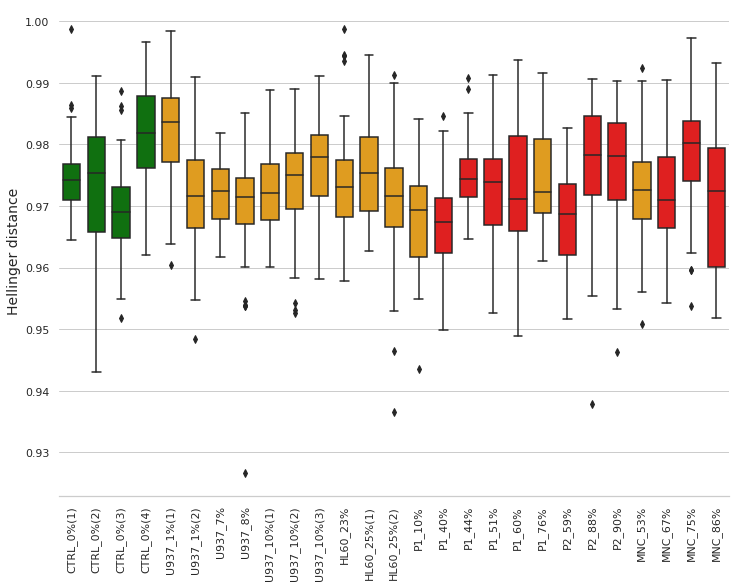

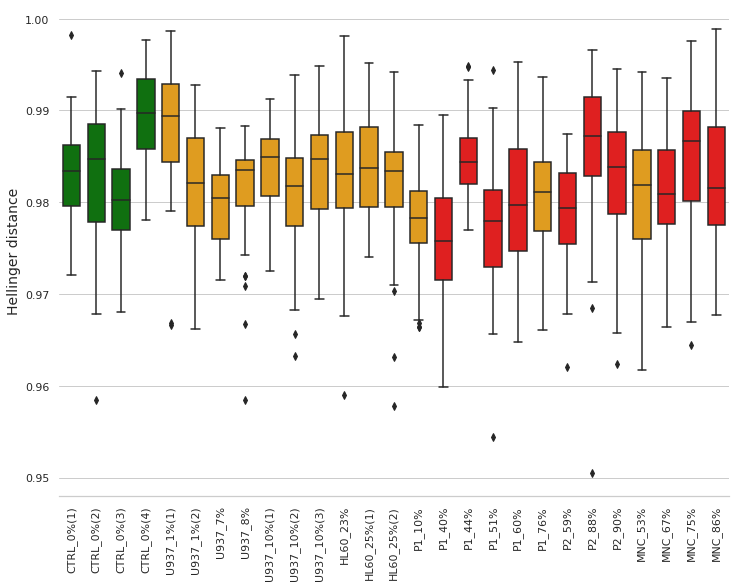

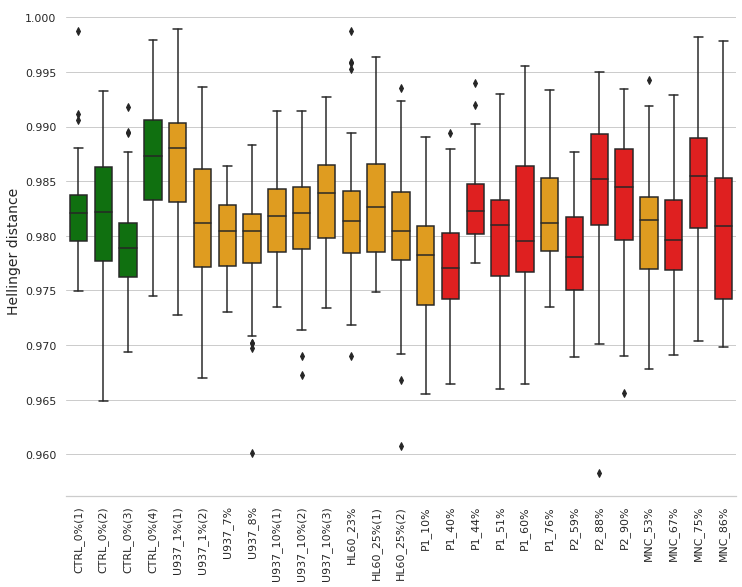

In [313]:
df_h0 = pd.DataFrame(h0s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h0.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

########################################################
df_h1 = pd.DataFrame(h1s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h1.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

#########################################################
df_h2 = pd.DataFrame(h2s, index=labels)

sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(12, 9))
xvalues = labels
palette = colours_of_interest

melted_df = df_h2.T.set_axis(xvalues, axis=1).melt(var_name='Sample', value_name='Hellinger distance')
sns.boxplot(data=melted_df, x='Sample', y='Hellinger distance', hue='Sample', palette=palette,
            width=0.7, dodge=False, ax=ax)

ax.legend_.remove()  # remove the legend, as the information is already present in the x labels
ax.set_xlabel('')  # remove unuseful xlabel ('Variable')
ax.set_ylabel("Hellinger distance", fontsize=14)


sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=90)
plt.show()

In [314]:
# record the accuracy for each sample
accuracies = [0 for i in range(27)]

for i in range(27):
    # 50 bootstrap iterations
    correct = 0
    for j in range(50):
        # sample
        n = sizes[i]
        indices = np.random.choice([l for l in range(n)], size=int(np.floor(n/4)), replace=True)
        sample = ph0_test[i][indices,:]
        
        # model 
        model = pomegranate.gmm.GeneralMixtureModel.from_samples(
            pomegranate.MultivariateGaussianDistribution,   #Either single function, or list of functions
            n_components=3,     #Required if single function passed as first arg
            X=sample,     #data format: each row is a point-coordinate, each column is a dimension
            )
        model.fit(
            X=sample,         #data format: each row is a coordinate, each column is a dimension
            weights = sample[:,1]-sample[:,0],  #List of weights. One for each point-coordinate
            stop_threshold = .001,  #Lower this value to get better fit but take longer. 
                                    #   (sklearn likes better/slower fits than pomegrante by default)
            )
        
        # compute the hellinger distance to the 3 models
        hdist = [Hellinger(Model0, model,0), Hellinger(Model1, model,1), Hellinger(Model2, model,2)]
        pred = hdist.index(min(hdist))
        if pred == phases_of_interest[i]:
            correct +=1
    print("{} is done".format(i))
    accuracies[i] = correct

0 is done


/home/qw817/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done


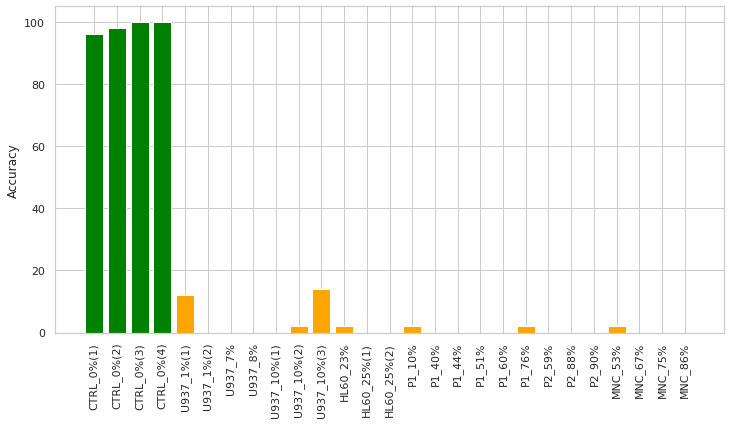

In [315]:
fig, ax = plt.subplots(figsize = (12,6))

for i in range(27):
    ax.bar(labels[i], (np.array(accuracies)*2)[i], color=colours_of_interest[i], label=cel_labels[i])
#plt.legend()
plt.xticks(rotation= 90)
plt.ylabel("Accuracy")
plt.show()

In [316]:
print("Average accuracy: ",sum(accuracies)/(50*27))

Average accuracy:  0.15925925925925927
